In [1]:
# 2019년 7월부터 2020년 8월까지 존재

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import os
import time
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings

warnings.filterwarnings("ignore")

In [4]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [5]:
# #Matplotlib 한국어 세팅
# import platform
# from matplotlib import font_manager, rc

# plt.rcParams['axes.unicode_minus'] = False

# if platform.system() == 'Darwin':
#     rc('font', family='AppleGothic')
# elif platform.system() == 'Windows':
#     font_name = font_manager.FontProperties(fname='/content/malgun.ttf').get_name()
#     rc('font', family=font_name)

In [6]:
pd.set_option('display.max_columns', 50)

In [7]:
# os.listdir("./data")

In [8]:
start = time.time()
df = pd.read_csv("/content/drive/MyDrive/KGU/논문/data/통합데이터.csv")

print("걸린 시간 :", time.time()- start)



걸린 시간 : 141.0057988166809


In [9]:
df.rename(columns={'PROCESS_DT' : '처리일시',
'DLVR_REQUST_ENTRPS_ID' : '배달요청업체ID',
'DLVR_REQUST_STTUS_VALUE' : '배달요청상태값',
'DLVR_RCEPT_ENTRPS_ID' : '배달접수업체ID',
'DLVR_STORE_ID' : '배달상점ID',
'DLVR_STORE_INDUTY_NM' : '배달상점 업종명',
'DLVR_STORE_LEGALDONG_CODE' : '배달상점법정동코드',
'DLVR_STORE_BRTC_NM' : '배달상점광역시도명',
'DLVR_STORE_SIGNGU_NM' : '배달상점시군구명',
'DLVR_STORE_LEGALDONG_NM' : '배달상점법정동명',
'DLVR_STORE_LI_NM' : '배달상점리명',
'DLVR_STORE_ADSTRD_CODE' : '배달상점행정동코드',
'DLVR_STORE_RDNMADR_CODE' : '배달상점도로명주소 코드',
'DLVR_DSTN_LEGALDONG_CODE' : '배달목적지법정동코드',
'DLVR_DSTN_BRTC_NM' : '배달목적지광역시도명',
'DLVR_DSTN_SIGNGU_NM' : '배달목적지시군구명',
'DLVR_DSTN_LEGALDONG_NM' : '배달목적지법정동명',
'DLVR_DSTN_LI_NM' : '배달목적지 리명',
'DLVR_DSTN_ADSTRD_CODE' : '배달목적지행정동코드',
'DLVR_DSTN_RDNMADR_CODE' : '배달목적지도로명주소 코드',
'DLVR_MAN_ID' : '배달자ID',
'DLVR_AMOUNT' : '배달금액',
'CALL_RLAY_FEE_AMOUNT' : '호출중계수수료금액',
'GOODS_AMOUNT' : '상품금액',
'SETLE_KND_VALUE' : '결제종류값',
'SETLE_CARD_NM' : '결제카드명',
'DLVR_RCEPT_TIME' : '배달접수시간',
'DLVR_CARALC_TIME' : '배달배차시간',
'DLVR_RECPT_TIME' : '배달수령시간',
'DLVR_COMPT_TIME' : '배달완료시간',
'DLVR_CANCL_TIME' : '배달취소시간',
'SIGNGU_CODE' : '시군구코드',
'BRTC_NM' : '광역시도명', 
'SIGNGU_NM' : '시군구명', 
'OTHBC_DE' : '공개 일', 
'OTHBC_TIME' : '공개 시간', 
'PRCPT_TY_NM' : '강수 유형명', 
'HD' : '습도',
'ONEHR_PRCPT_QY_VALUE' : '1시간 강수량 값', 
'TMPRT' : '기온', 
'WS' : '풍속', 
'WIND_IN_TY_NM' : '바람강도 유형명',
'EAST_WST_WIND_TY_NM' : '동쪽서쪽바람유형명', 
'WD_VALUE' : '풍향값', 
'WD_CTGRY_NM' : '풍향카테고리명'}, inplace=True)

In [10]:
display(df.head(3))
print("전체 개수 :", len(df))

,처리일시,배달요청업체ID,배달요청상태값,배달접수업체ID,배달상점ID,배달상점 업종명,배달상점법정동코드,배달상점광역시도명,배달상점시군구명,배달상점법정동명,배달상점리명,배달상점행정동코드,배달상점도로명주소 코드,배달목적지법정동코드,배달목적지광역시도명,배달목적지시군구명,배달목적지법정동명,배달목적지 리명,배달목적지행정동코드,배달목적지도로명주소 코드,배달자ID,배달금액,호출중계수수료금액,상품금액,결제종류값,결제카드명,배달접수시간,배달배차시간,배달수령시간,배달완료시간,배달취소시간,시군구코드,광역시도명,시군구명,공개 일,공개 시간,강수 유형명,습도,1시간 강수량 값,기온,풍속,바람강도 유형명,동쪽서쪽바람유형명,풍향값,풍향카테고리명
0,2019-07-01,C000029,1,C000043,S0027047,족발/보쌈,4115010100,경기도,의정부시,의정부동,NaN,4115051000,4.115043e+11,4115010400,경기도,의정부시,신곡동,NaN,4.115057e+09,4.115032e+11,D0000511,3500,200,32000,2,NaN,2019-07-01 20:36:58,2019-07-01 20:37:25,2019-07-01 20:59:53,2019-07-01 21:00:08,NaN,41150,경기도,의정부시,2019-07-01,20,없음,98.0,0.0,18.8,0.0,약,none,151,SSE
1,2019-07-01,C000037,1,C000043,S0002634,야식,4115010100,경기도,의정부시,의정부동,NaN,4115052000,4.115043e+11,4115010100,경기도,의정부시,의정부동,NaN,4.115060e+09,4.115032e+11,D0000225,3500,200,21000,1,승인:비씨카드사,2019-07-01 20:45:47,2019-07-01 20:45:59,2019-07-01 21:02:26,2019-07-01 21:03:00,NaN,41150,경기도,의정부시,2019-07-01,20,없음,98.0,0.0,18.8,0.0,약,none,151,SSE
2,2019-07-01,C000029,1,C000043,S0028418,회,4115010100,경기도,의정부시,의정부동,NaN,4115051000,4.115043e+11,4115010100,경기도,의정부시,의정부동,NaN,4.115051e+09,4.115032e+11,D0000225,3500,200,36000,1,승인:KB국민카드,2019-07-01 20:12:38,2019-07-01 20:12:56,2019-07-01 20:26:11,2019-07-01 20:27:27,NaN,41150,경기도,의정부시,2019-07-01,20,없음,98.0,0.0,18.8,0.0,약,none,151,SSE


전체 개수 : 12619848


In [11]:
# 필요없는 데이터컬럼 제거
df.drop(['배달요청상태값','배달상점법정동코드','배달상점광역시도명','배달상점시군구명',
         '배달상점법정동명','배달상점리명','배달상점행정동코드','배달상점도로명주소 코드','시군구코드',
         '배달목적지법정동코드','배달목적지광역시도명','배달목적지시군구명','배달목적지법정동명',
         '배달목적지 리명','배달목적지행정동코드','배달목적지도로명주소 코드','결제카드명','공개 일',
         '바람강도 유형명', '동쪽서쪽바람유형명', '풍향값','풍향카테고리명','배달취소시간'], axis=1, inplace=True)

In [12]:
display(df.head(3))

,처리일시,배달요청업체ID,배달접수업체ID,배달상점ID,배달상점 업종명,배달자ID,배달금액,호출중계수수료금액,상품금액,결제종류값,배달접수시간,배달배차시간,배달수령시간,배달완료시간,광역시도명,시군구명,공개 시간,강수 유형명,습도,1시간 강수량 값,기온,풍속
0,2019-07-01,C000029,C000043,S0027047,족발/보쌈,D0000511,3500,200,32000,2,2019-07-01 20:36:58,2019-07-01 20:37:25,2019-07-01 20:59:53,2019-07-01 21:00:08,경기도,의정부시,20,없음,98.0,0.0,18.8,0.0
1,2019-07-01,C000037,C000043,S0002634,야식,D0000225,3500,200,21000,1,2019-07-01 20:45:47,2019-07-01 20:45:59,2019-07-01 21:02:26,2019-07-01 21:03:00,경기도,의정부시,20,없음,98.0,0.0,18.8,0.0
2,2019-07-01,C000029,C000043,S0028418,회,D0000225,3500,200,36000,1,2019-07-01 20:12:38,2019-07-01 20:12:56,2019-07-01 20:26:11,2019-07-01 20:27:27,경기도,의정부시,20,없음,98.0,0.0,18.8,0.0


# 데이터 확인 전 전처리

### 결측치 처리
- 배달완료시간이 NaN 인 row 드롭
- 풍속에서 결측치인 값을 drop한다.


### 이상치 처리
- 습도값이 0 이하인 것은 제거한다.
- 풍속이 0 이하인 것은 제거한다.
- 상품금액이 0인 값 드롭




In [13]:
before = len(df)
# 배달완료시간 결측치 삭제
df = df.dropna(subset=['배달완료시간'], how='any',axis= 0)
# 풍속 결측치 삭제
df = df.dropna(subset=['풍속'], how='any',axis= 0)

# 습도값, 풍속, 상품금액이 0 이하인 것 제거
df = df[df['습도'] > 0]
df = df[df['풍속'] > 0]
df = df[df['상품금액'] > 0]
after = len(df)
print("제거한 항 개수 :", before - after)

제거한 항 개수 : 3335591


# 파생변수 생성

In [14]:
# 강수유형명에 따른 강수 여부 구분 ==> 강수여부로 컬럼명 변환
df['강수 유형명'].replace("없음", "0", inplace=True) # 없음은 0 / 그 외는 1
df['강수 유형명'].replace("비", "1", inplace=True)
df['강수 유형명'].replace("눈", "1", inplace=True)
df['강수 유형명'].replace("진눈개비", "1", inplace=True)

df['강수 유형명'] = df['강수 유형명'].astype(int)

df.rename({'강수 유형명':'강수여부'}, inplace=True)

In [15]:
# datetime 변환
df['배달접수시간'] = pd.to_datetime(df['배달접수시간'])
df['배달배차시간'] = pd.to_datetime(df['배달배차시간'])
df['배달수령시간'] = pd.to_datetime(df['배달수령시간'])
df['배달완료시간'] = pd.to_datetime(df['배달완료시간'])


# 배달시간 컬럼 생성
df['라이더배치시간'] = df['배달배차시간'] - df['배달접수시간']
df['픽업이동시간'] = df['배달수령시간'] - df['배달배차시간']
df['순수배달시간'] = df['배달완료시간'] - df['배달수령시간']
df['총배달시간'] = df['배달완료시간'] - df['배달접수시간']

# 배달완료시각 및 주문접수시각 드롭
df = df.drop(['배달접수시간','배달배차시간','배달수령시간','배달완료시간'], axis=1)

In [16]:
# 시간을 계산할 수 있도록 분단위로 바꿔보자
deli_time = df['총배달시간'].to_list()
new_list = []
for time in tqdm(deli_time) :
    new_list.append(time.total_seconds() / 60)
    
df['배달시간계산'] = new_list

100%|██████████| 9284257/9284257 [00:05<00:00, 1550050.31it/s]


In [17]:
# # 코로나 -> 전 / 대확산 / 후
# # 2020년 2~3월 : 신천지 (2월 18일 발생 시작 - 4월 29일 종료)
# # 2020년 8월 : 사랑제일교회 (8월 3일 발생 시작 ~)


# 주문일자 구분 준비
df['처리일시'] = pd.to_datetime(df['처리일시'])


# # 4개로 나눠서 진행
# # 2019년 ~ 2020년 1월까지
query1 = "처리일시 < '2020-02-18'"
date1 = df.query(query1)
date1['코로나'] = "전"

# # 2020년 2월 18일 ~ 4월 29일 
query2 = "(처리일시 > '2020-02-17') and (처리일시 < '2020-04-30')"
date2 = df.query(query2)
date2['코로나'] = "대확산"


# # 2020년 5월 ~7월 
query3 = "(처리일시 > '2020-04-29') and (처리일시 < '2020-08-03')"
date3 = df.query(query3)
date3['코로나'] = "후"


# # 2020년 7월 이후 
query4 = "처리일시 > '2020-08-02'"
date4 = df.query(query4)
date4['코로나'] = "대확산"

# 병합
df = pd.concat([date1, date2, date3, date4])

In [18]:
# 계절 => 봄 / 여름 / 가을 / 겨울
# 봄　 (MAM)　3,4,5월
# 여름 (JJA)　　6,7,8월
# 가을 (SON)　9,10,11월
# 겨울 (DJF)　 12,1,2월


# # 4개로 나눠서 진행
# # 2019년 8월까지 여름
query1 = "처리일시 < '2019-09-01'"
date1 = df.query(query1)
date1['계절'] = "여름"

# # 2019년 9월부터 2019 11월까지 가을
query2 = "(처리일시 > '2019-08-31') and (처리일시 < '2019-12-01')"
date2 = df.query(query2)
date2['계절'] = "가을"


# # 2019년 12월부터 2020년 2월까지
query3 = "(처리일시 > '2019-11-30') and (처리일시 < '2020-03-01')"
date3 = df.query(query3)
date3['계절'] = "겨울"

# # 2020년 3월부터 5월까지
query4 = "(처리일시 > '2020-02-29') and (처리일시 < '2020-06-01')"
date4 = df.query(query4)
date4['계절'] = "봄"


# # 2020년 6월부터 끝까지
query5 = "처리일시 > '2020-05-31'"
date5 = df.query(query5)
date5['계절'] = "여름"


# 병합
df = pd.concat([date1, date2, date3, date4, date5])

In [19]:
# 주중 주말 구분 리스트로 진행해보자
# 주중 주말 기념일 구분 
df['처리일시'] = df['처리일시'].astype(str)
check_list = df['처리일시'].to_list()


holiday_list = ['2019-08-15', '2019-09-12', '2019-09-13', '2019-09-14',
               '2019-10-03', '2019-10-09', '2019-12-25' , '2020-01-01', 
                '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
                '2020-03-01','2020-04-15', '2020-04-30', '2020-05-05', 
                '2020-06-06', '2020-08-15']


date_list = []
for date in tqdm(check_list):
    if date in holiday_list :
        date_list.append("기념일")
    
    else :
        if pd.Timestamp(date).dayofweek > 4 :
            date_list.append("주말")
        else :
            date_list.append("주중")
            
df['요일구분'] = date_list

100%|██████████| 9284257/9284257 [00:33<00:00, 273628.77it/s]


In [20]:
# 요일별 구분을 위한 요일 추가
df['처리일시'] = df['처리일시'].astype(str)
check_list = df['처리일시'].to_list()

dayofweek_list = []

for date in tqdm(check_list):
    day_name = pd.Timestamp(date).dayofweek
    if day_name == 0 :
        dayofweek_list.append("월요일")
    elif day_name == 1:
        dayofweek_list.append("화요일")
    elif day_name == 2:
        dayofweek_list.append("수요일")
    elif day_name == 3:
        dayofweek_list.append("목요일")
    elif day_name == 4:
        dayofweek_list.append("금요일")
    elif day_name == 5:
        dayofweek_list.append("토요일")
    else :
        dayofweek_list.append("일요일")
        
df['요일'] = dayofweek_list

100%|██████████| 9284257/9284257 [00:31<00:00, 290189.53it/s]


In [21]:
# # 배달시간 구분 코드 --> dataframe 형태로는 너무 느림

# # 배달시간 구분

# check = df['배달시간'].to_list()

# deli_time_ctg = []
# for x in tqdm(check) :
#     time = x.total_seconds()
#     if time < 900 :
#         deli_time_ctg.append(0)
#     elif 900 <= time < 1200 :
#         deli_time_ctg.append(1)
#     elif 1200 <= time < 1500 :
#         deli_time_ctg.append(2)
#     elif 1500 <= time < 1800 :
#         deli_time_ctg.append(3)
#     elif 1800 <= time < 2100 :
#         deli_time_ctg.append(4)
#     else :
#         deli_time_ctg.append(5)  
        
# df['배달시간구분'] = deli_time_ctg

In [22]:
# 주문시각에 따른 분류

# 4개의 카테고리로 분류
# 17 ~ 20 ==> 저녁
# 21 ~ 23 ==> 야식
# 11 ~ 16 ==> 점심
# 0 ~ 10 ==> 기타

hour_list = df['공개 시간'].to_list()

etc = [0,1,2,3,4,5,6,7,8,9,10]
lunch = [11,12,13,14,15,16]
dinner = [17,18,19,20] 

hour_ctg_list = []
for hour in tqdm(hour_list) :
    if hour in etc :
        hour_ctg_list.append("기타")
    elif hour in lunch :
        hour_ctg_list.append("점심")
    elif hour in dinner :
        hour_ctg_list.append("저녁")
    else :
        hour_ctg_list.append("야식")
        
df['주문시각분류'] = hour_ctg_list

100%|██████████| 9284257/9284257 [00:07<00:00, 1312120.97it/s]


In [23]:
display(df.head(3))

,처리일시,배달요청업체ID,배달접수업체ID,배달상점ID,배달상점 업종명,배달자ID,배달금액,호출중계수수료금액,상품금액,결제종류값,광역시도명,시군구명,공개 시간,강수 유형명,습도,1시간 강수량 값,기온,풍속,라이더배치시간,픽업이동시간,순수배달시간,총배달시간,배달시간계산,코로나,계절,요일구분,요일,주문시각분류
364,2019-07-01,C000032,C000367,S0000545,카페/디저트,D0000247,3700,0,15500,2,경기도,남양주시,18,0,80.0,0.0,21.1,2.5,0 days 00:10:07,0 days 00:30:06,0 days 00:00:02,0 days 00:40:15,40.250000,전,여름,주중,월요일,저녁
365,2019-07-01,C000032,C000362,S0000535,카페/디저트,D0000220,3700,0,15500,2,경기도,남양주시,18,0,80.0,0.0,21.1,2.5,0 days 00:00:55,0 days 00:11:26,0 days 00:00:02,0 days 00:12:23,12.383333,전,여름,주중,월요일,저녁
366,2019-07-01,C000032,C000367,S0000603,카페/디저트,D0000247,3700,0,21500,2,경기도,남양주시,18,0,80.0,0.0,21.1,2.5,0 days 00:00:22,0 days 01:04:24,0 days 00:19:43,0 days 01:24:29,84.483333,전,여름,주중,월요일,저녁


# 데이터 확인 후 전처리
- quantile 을 통해 정상적인 배달시간 데이터만 사용한다.
- quantile 을 통해 정삭적인 배달금액 데이터만 사용한다.
- quantile 을 통해 정삭적인 상품금액 데이터만을 사용한다.
- quantile 을 통해 정삭적인호출중계수수료금액 데이터만을 사용한다. 
- 배달요청업체ID 값이 C000032 인 것을 제거한다.

In [24]:
# 배달요청업체ID 값이 C000032 인 것을 제거

before = len(df)
df = df[df['배달요청업체ID']!='C000032']
after = len(df)

print("제거한 항 개수 :", before - after)

제거한 항 개수 : 385372


In [25]:
before = len(df)

# 배달시간은 배달시간계산 컬럼을 이용해 이상치를 제거한다.
df = df[df['배달시간계산'] <= 70.0]

# 배달비는 배달금액 컬럼으로 이상치를 제거한다.
df = df[df['배달금액'] <= 7000]

# 상품금액이 5천원 이하는 것은 제외 / 6만원 이상인 것은 제외
df = df[df['상품금액'] <= 60000]
df = df[df['상품금액'] >= 5000]

# 수수료는 600원 이하만 사용한다.
df = df[df['호출중계수수료금액'] <= 600]

after = len(df)

print("제거한 항 개수 :", before - after)

제거한 항 개수 : 350178


In [26]:
# 인덱스 재설정
df.reset_index(drop=True, inplace=True)

In [27]:
print("전체 개수 :", len(df))

전체 개수 : 8548707


# 데이터 시각화

#### 1. 배달상점 & 라이더 확인

In [28]:
# 전체 데이터 배달업체 관련 개수
print("배달요청업체ID : ",df['배달요청업체ID'].nunique())
print("배달접수업체ID : ",df['배달접수업체ID'].nunique())
print("배달상점ID : ",df['배달상점ID'].nunique())
print("배달자ID : ",df['배달자ID'].nunique())

배달요청업체ID :  275
배달접수업체ID :  328
배달상점ID :  21704
배달자ID :  13584


In [29]:
# datetime 변환
df['처리일시'] = pd.to_datetime(df['처리일시'])
# 년도-월 구분
df['Date'] = df['처리일시'].dt.strftime('%Y-%m')

# 구분을 위한 리스트화
date_list = df['Date'].unique()

In [30]:
shop_list = []
rider_list = []

for x in tqdm(date_list) :
    check = df[df['Date']==x]
    shop_list.append(check['배달상점ID'].nunique())
    rider_list.append(check['배달자ID'].nunique())
#     print(x, "O2O 서비스 업체 수 :", check['배달상점ID'].nunique())
#     print(x, "배달대행업체 수 :", check['배달접수업체ID'].nunique())
#     print(x,"자영업자 수 :", check['배달상점ID'].nunique())
#     print(x, "라이더 수 :", check['배달자ID'].nunique())
#     print()

100%|██████████| 14/14 [00:11<00:00,  1.21it/s]


In [31]:
# 시각화용 자료 생성
visual_df = pd.DataFrame([date_list, shop_list, rider_list]).T
visual_df.columns = ['날짜', '배달상점 수', '라이더 수']

In [32]:
visual_df['배달상점 수'] = visual_df['배달상점 수'].astype(int)
visual_df['라이더 수'] = visual_df['라이더 수'].astype(int)

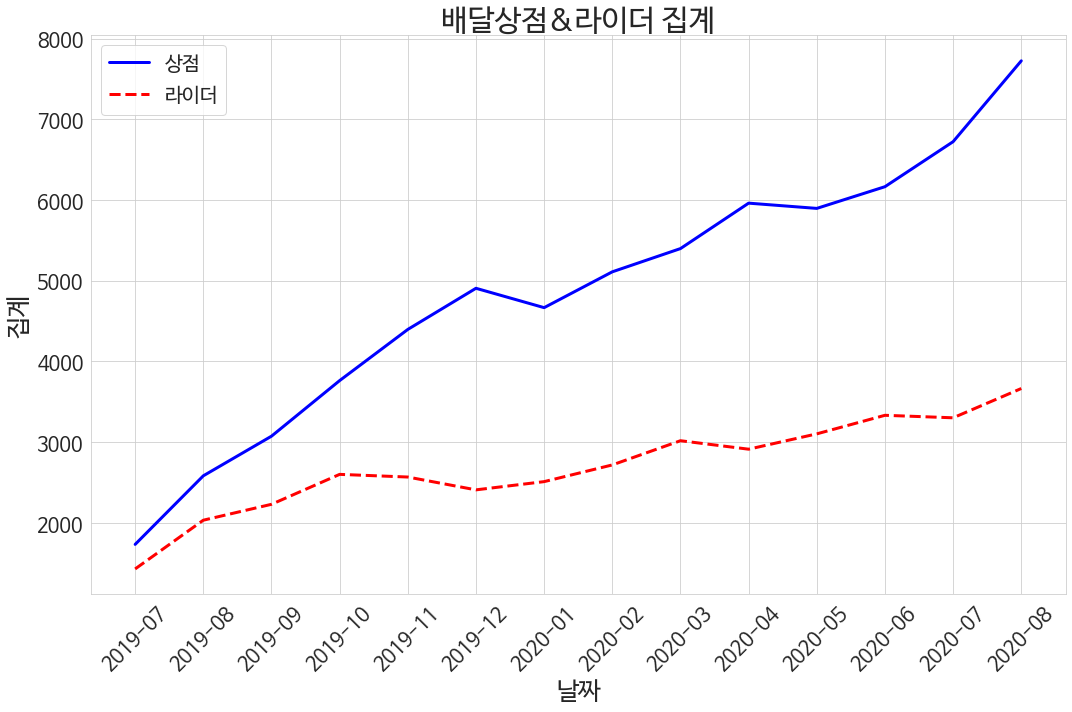

In [33]:
# 배달상점과 라이더 시간대별 파악

plt.figure(figsize=(15,10))
a = sns.lineplot(x='날짜', y='배달상점 수', data=visual_df, color='blue', linewidth=3)
sns.lineplot(x='날짜', y='라이더 수',data=visual_df, color='red', linewidth=3, linestyle='--')
plt.title('배달상점&라이더 집계', fontsize=30)
plt.ylabel("집계", fontsize=25)
plt.xlabel("날짜", fontsize=25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.legend(labels=('상점', '라이더'), fontsize=20)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/KGU/논문/data/Figure1.배달상점&라이더 집계.png")
plt.show()

#### 2. 폐업수 확인

In [34]:
all_shop = []
all_rider = []

for x in tqdm(date_list) :
    check = df[df['Date']==x]
    all_shop.append(check['배달상점ID'].unique())
    all_rider.append(check['배달자ID'].unique())

100%|██████████| 14/14 [00:10<00:00,  1.40it/s]


In [35]:
close_shop = [0]
quit_rider = [0]

for zz in tqdm(range(len(date_list)-1)) :
    close_shop.append(len(set(all_shop[zz]) - set(all_shop[zz+1])))
    quit_rider.append(len(set(all_rider[zz]) - set(all_rider[zz+1])))

100%|██████████| 13/13 [00:00<00:00, 385.24it/s]


In [36]:
visual_df2 = pd.DataFrame([date_list, close_shop, quit_rider]).T
visual_df2.columns = ['날짜', '폐업상점 수', '이탈라이더']

In [37]:
visual_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      14 non-null     object
 1   폐업상점 수  14 non-null     object
 2   이탈라이더   14 non-null     object
dtypes: object(3)
memory usage: 464.0+ bytes


In [38]:
visual_df2['폐업상점 수'] = visual_df2['폐업상점 수'].astype(int)
visual_df2['이탈라이더'] = visual_df2['이탈라이더'].astype(int)

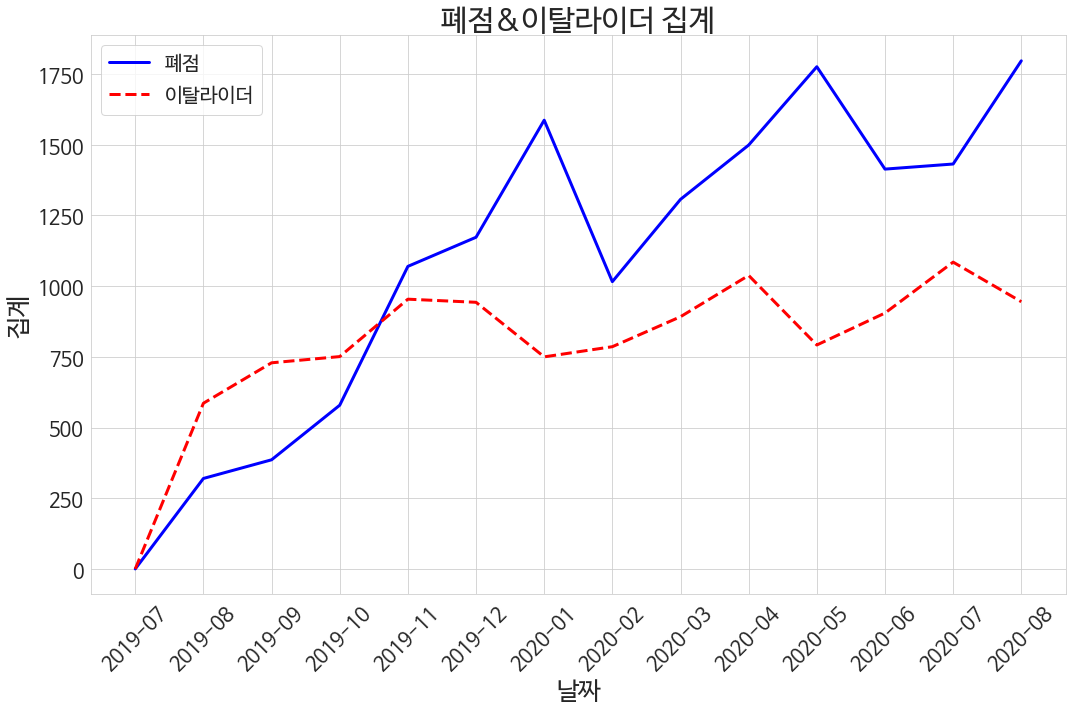

In [39]:
# 배달상점과 라이더 시간대별 파악

plt.figure(figsize=(15,10))
a = sns.lineplot(x='날짜', y='폐업상점 수', data=visual_df2, color='blue', linewidth=3)
sns.lineplot(x='날짜', y='이탈라이더',data=visual_df2, color='red', linewidth=3, linestyle='--')
plt.title('폐점&이탈라이더 집계', fontsize=30)
plt.ylabel("집계", fontsize=25)
plt.xlabel("날짜", fontsize=25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.legend(labels=('폐점', '이탈라이더'), fontsize=20)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/KGU/논문/data/Figure2.폐점&이탈라이더 집계.png")
plt.show()

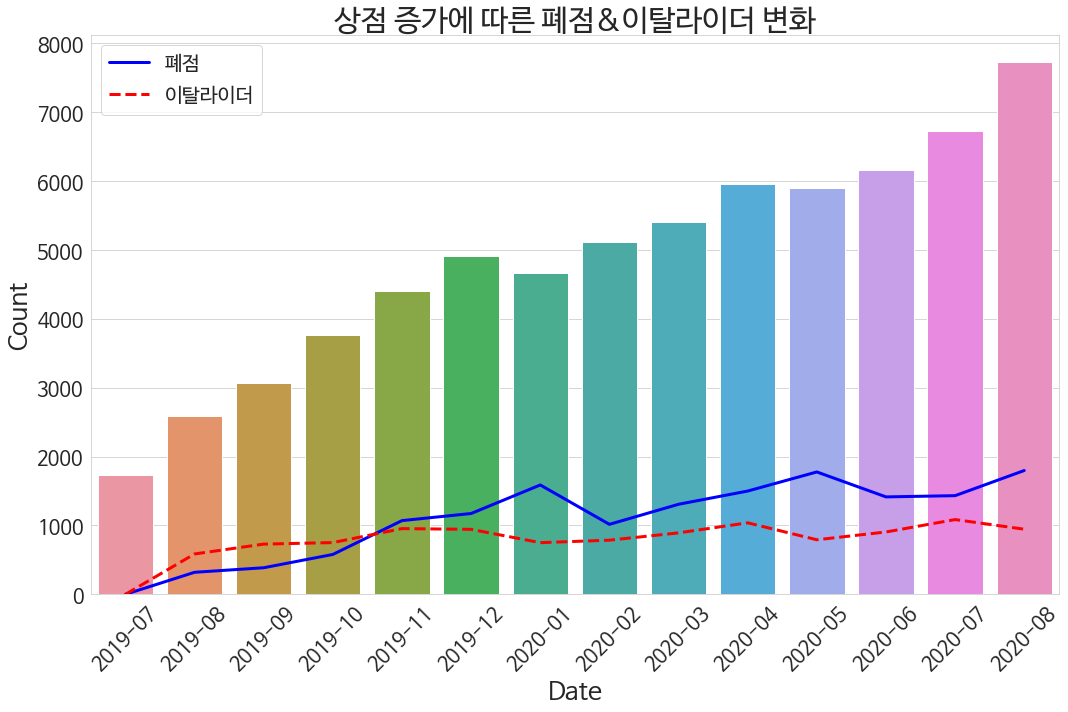

In [40]:
# 전체 증가 건수와 폐점 동시 시각화


plt.figure(figsize=(15,10))

sns.lineplot(x='날짜', y='폐업상점 수', data=visual_df2, color='blue', linewidth=3)
sns.lineplot(x='날짜', y='이탈라이더',data=visual_df2, color='red', linewidth=3, linestyle='--')
sns.barplot(x='날짜', y='배달상점 수', data=visual_df)
plt.title('상점 증가에 따른 폐점&이탈라이더 변화', fontsize=30)
plt.ylabel("Count", fontsize=25)
plt.xlabel("Date", fontsize=25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.legend(labels=('폐점', '이탈라이더'), fontsize=20)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/KGU/논문/data/Figure3.상점 증가에 따른 폐점&이탈라이더 변화.png")
plt.show()



#### 3.요일별 주문건수 파악

In [41]:
dayofweek_df = df.groupby("요일", as_index=False).size()
dayofweek_df = pd.DataFrame(dayofweek_df)
dayofweek_df

,요일,size
0,금요일,1245480
1,목요일,1114128
2,수요일,1122379
3,월요일,1063423
4,일요일,1502404
5,토요일,1413162
6,화요일,1087731


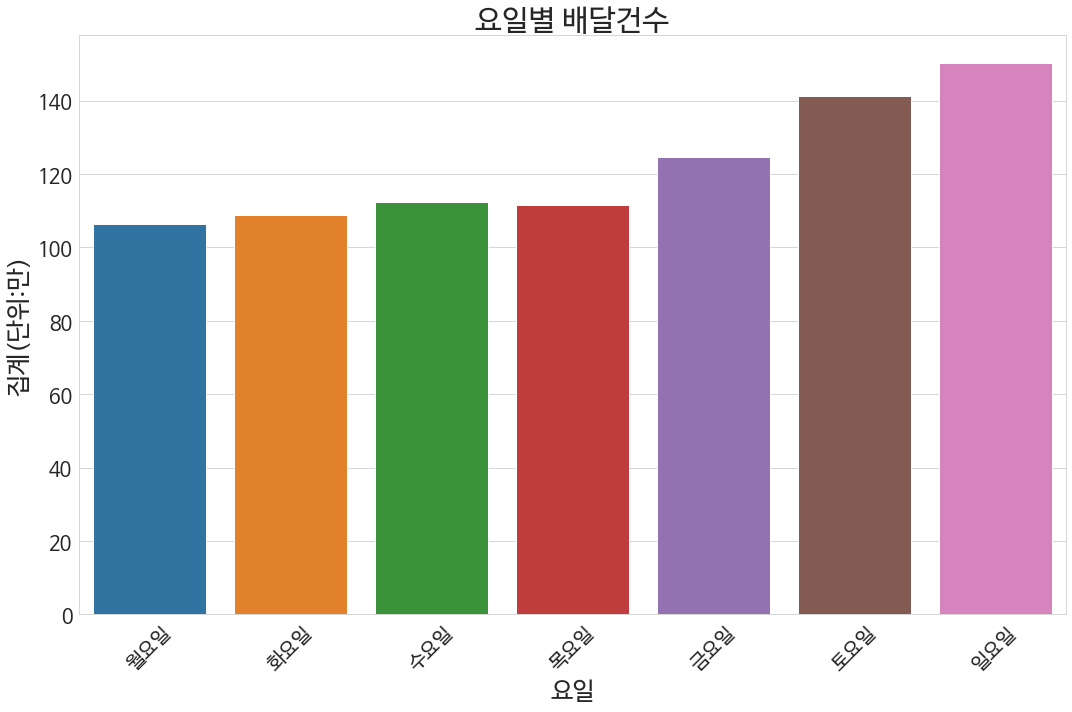

In [42]:
plt.figure(figsize=(15,10))
sns.barplot(x='요일', y=dayofweek_df['size']/10000,data=dayofweek_df, order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일'])
plt.title('요일별 배달건수', fontsize=30)
plt.ylabel("집계(단위:만)", fontsize=25)
plt.xlabel("요일", fontsize=25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/KGU/논문/data/Figure4.요일별 배달건수.png")
plt.show()

#### 4. 전체배달건수 파악

In [43]:
# 시간별 배달건수
time_df = df.groupby("Date", as_index=False).size()
time_df = pd.DataFrame(time_df)

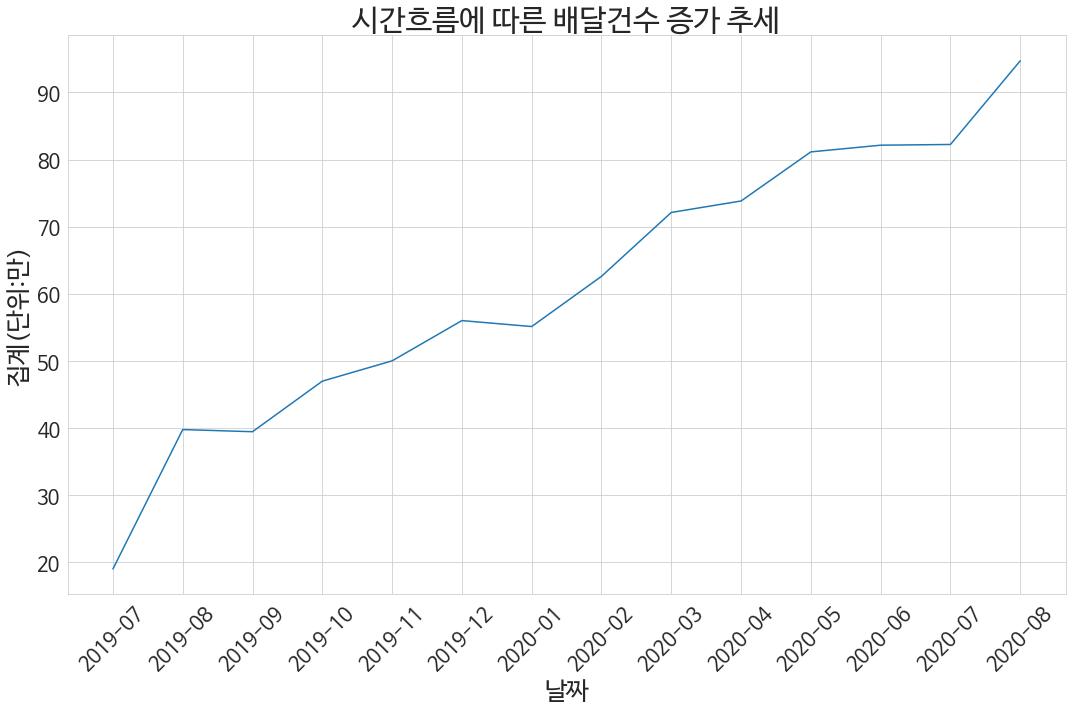

In [44]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Date', y=time_df['size']/10000,data=time_df)
plt.title('시간흐름에 따른 배달건수 증가 추세', fontsize=30)
plt.ylabel("집계(단위:만)", fontsize=25)
plt.xlabel("날짜", fontsize=25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/KGU/논문/data/Figure5.시간흐름에 따른 배달건수 증가 추세.png")
plt.show()

#### 5. 평균배달시간 파악

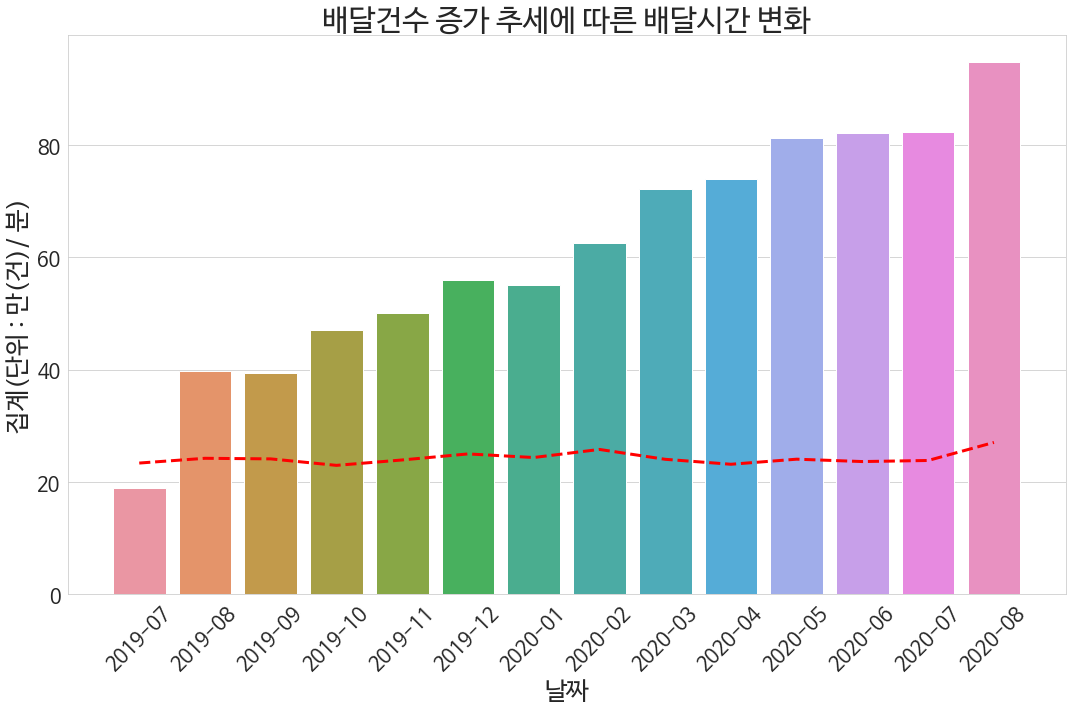

In [45]:
delivery_time_df = df[['Date', '배달상점 업종명', '광역시도명', '시군구명', '배달시간계산']]
time_check = delivery_time_df.groupby('Date', as_index=False).mean()

# 전체 배달건에 따른 배달시간 시각화
plt.figure(figsize=(15,10))
sns.barplot(x='Date', y=time_df['size']/10000,data=time_df)
sns.lineplot(x='Date', y='배달시간계산',data=time_check, color='red', linewidth=3, linestyle='--')
plt.title('배달건수 증가 추세에 따른 배달시간 변화', fontsize=30)
plt.ylabel("집계(단위 : 만(건)/ 분)", fontsize=25)
plt.xlabel("날짜", fontsize=25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/KGU/논문/data/Figure6.배달건수 증가 추세에 따른 배달시간 변화.png")
plt.show()

#### 6. 카테고리별 평균배달시간 파악

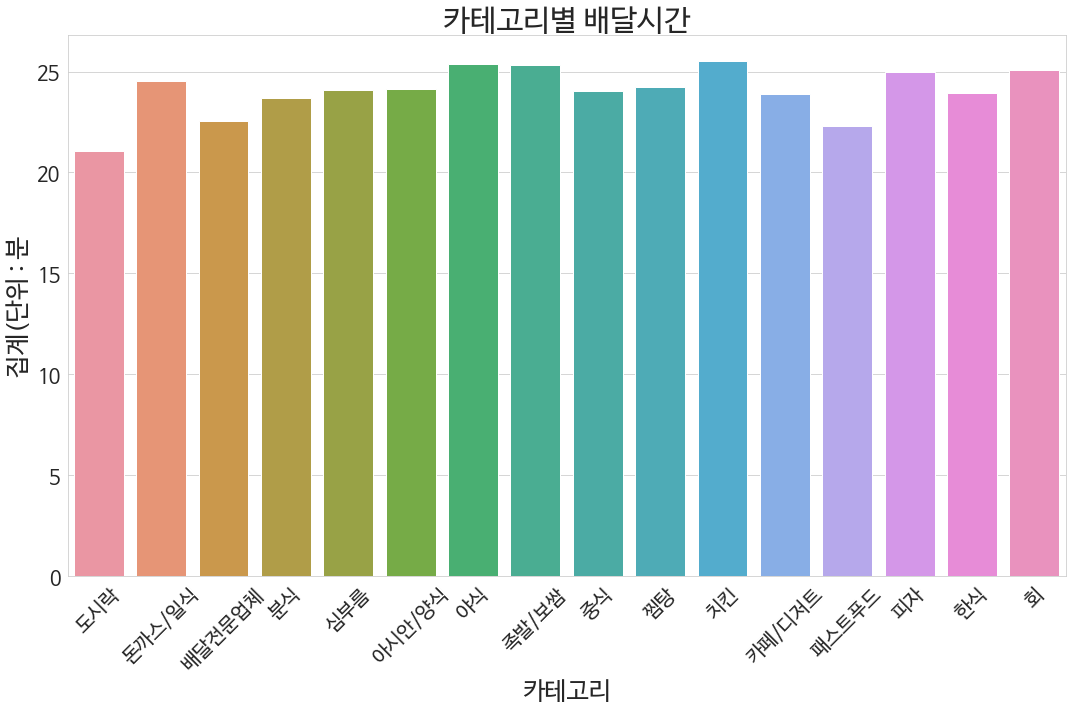

In [46]:
# 카테고리별 평균배달시간 확인

category_time_df = delivery_time_df.groupby(['배달상점 업종명'], as_index=False).mean()
category_time_df


plt.figure(figsize=(15,10))
sns.barplot(x='배달상점 업종명', y=category_time_df['배달시간계산'],data=category_time_df)
plt.title('카테고리별 배달시간', fontsize=30)
plt.ylabel("집계(단위 : 분", fontsize=25)
plt.xlabel("카테고리", fontsize=25)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/KGU/논문/data/Figure7.카테고리별 배달시간.png")
plt.show()

# # ?!?!!???? 카페디저트가 제일 오래걸린다?

#### 7. 행정구별 평균배달시간 파악

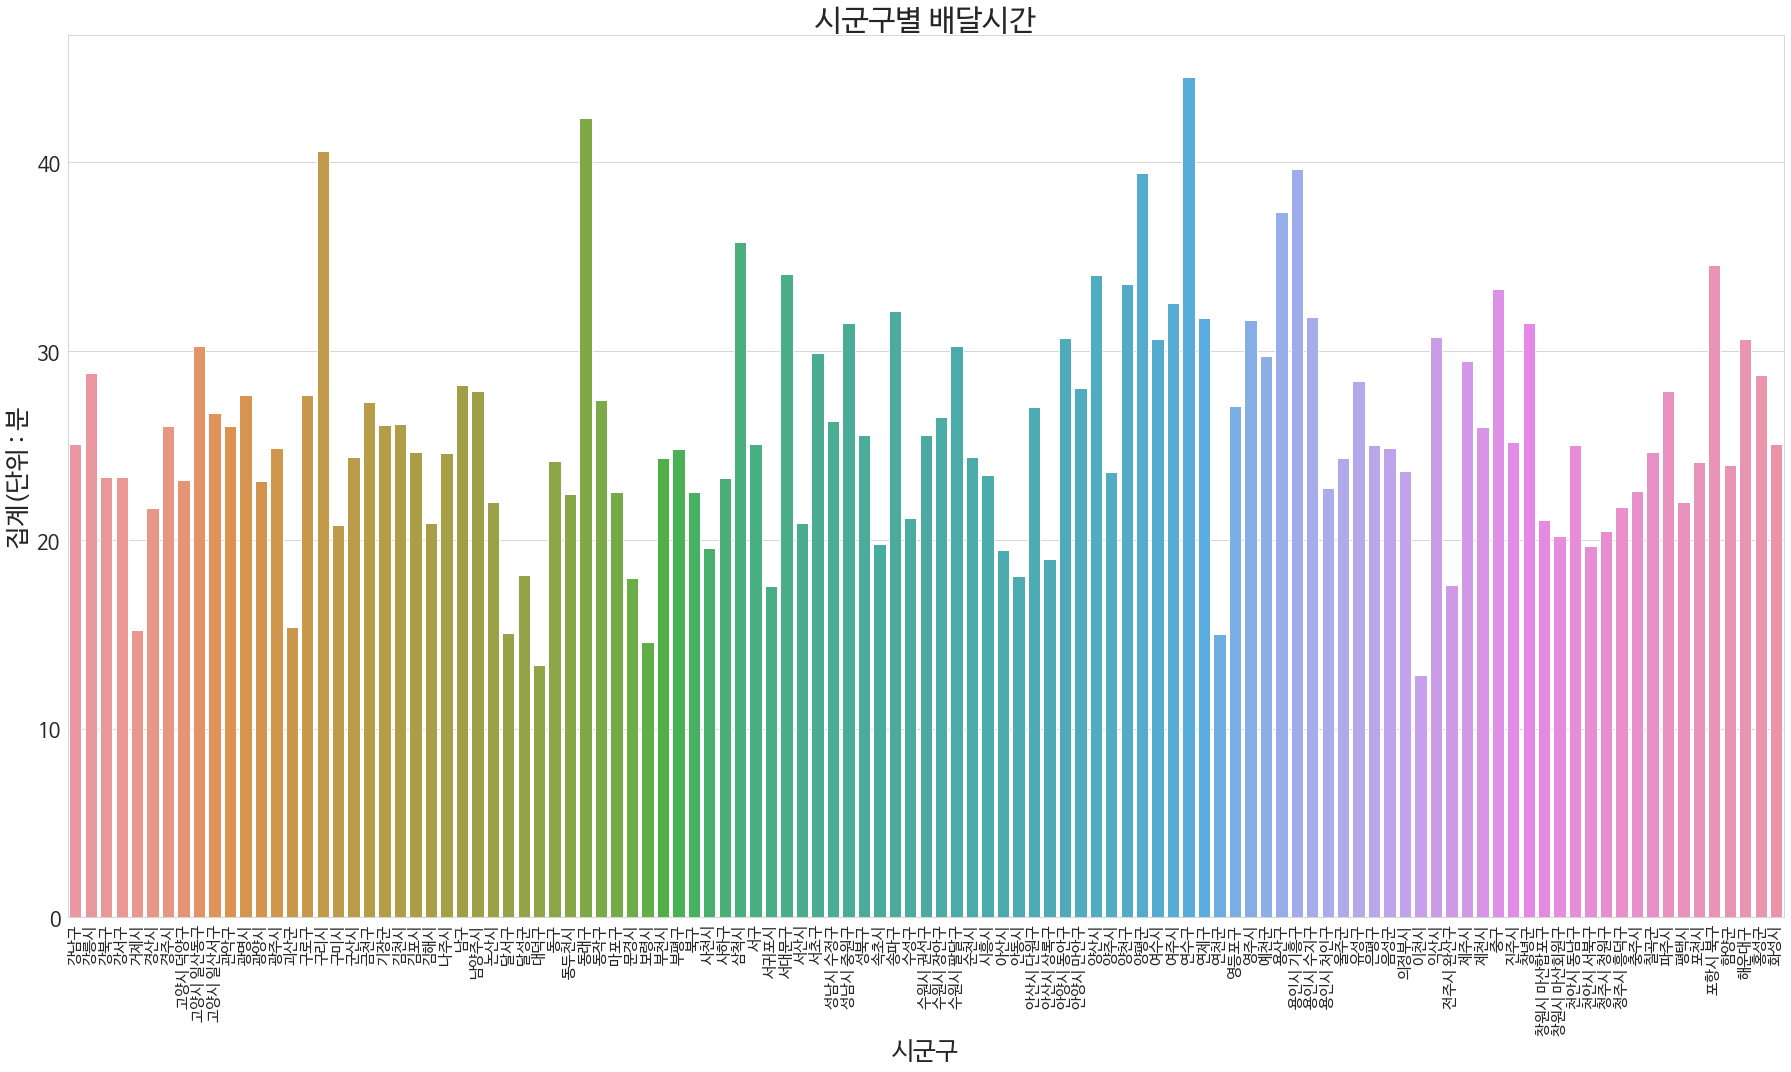

In [47]:
# 행정구별 구분
hangjeong = delivery_time_df.groupby('시군구명', as_index=False).mean()

plt.figure(figsize=(25,15))
sns.barplot(x='시군구명', y=hangjeong['배달시간계산'],data=hangjeong)
plt.title('시군구별 배달시간', fontsize=30)
plt.ylabel("집계(단위 : 분", fontsize=25)
plt.xlabel("시군구", fontsize=25)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/KGU/논문/data/Figure8.시군구별 배달시간.png")
plt.show()

# 서대문구 / 안산시 / 양평군 ... 평균이 120분 넘는 곳들은 뭐냐?


#### 8. 카테고리별 평균배달금액 파악

In [48]:
# 카테고리별 평균값 분류
category_price_mean = df.groupby(['배달상점 업종명'], as_index=False).mean() 

In [49]:
# 카테고리별 중앙값 분류 
category_price_median = df.groupby(['배달상점 업종명'], as_index=False).median() 

In [50]:
category_price_mean = category_price_mean[['배달상점 업종명', '배달금액', '호출중계수수료금액', '상품금액', '배달시간계산']]
category_price_median = category_price_median[['배달상점 업종명', '배달금액', '호출중계수수료금액', '상품금액', '배달시간계산']]

category_price_mean['구분'] = "평균값"
category_price_median['구분'] = '중앙값'


display(category_price_mean.head(2))
display(category_price_median.head(2))

,배달상점 업종명,배달금액,호출중계수수료금액,상품금액,배달시간계산,구분
0,도시락,3683.437146,276.792937,22758.559637,21.083314,평균값
1,돈까스/일식,3723.884397,258.486749,25106.305821,24.515069,평균값


,배달상점 업종명,배달금액,호출중계수수료금액,상품금액,배달시간계산,구분
0,도시락,3500,300,20500,19.233333,중앙값
1,돈까스/일식,3500,300,22500,22.866667,중앙값


In [51]:
new_df = pd.concat([category_price_mean,category_price_median], axis=0)
new_df.head(1)

,배달상점 업종명,배달금액,호출중계수수료금액,상품금액,배달시간계산,구분
0,도시락,3683.437146,276.792937,22758.559637,21.083314,평균값


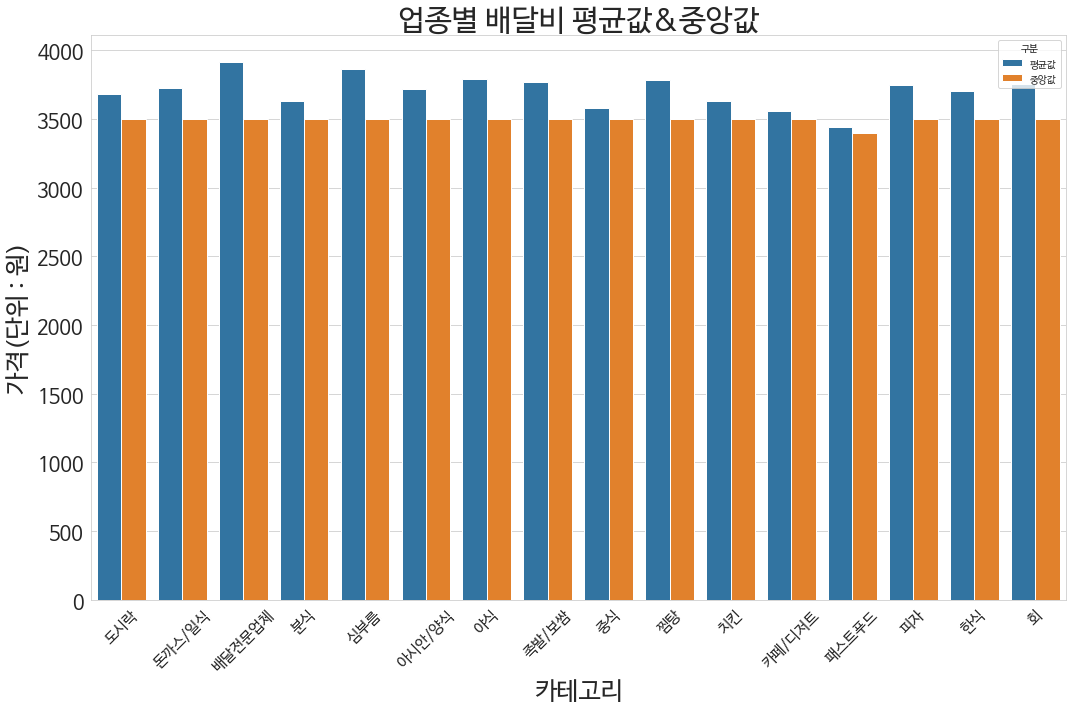

In [52]:
# 카테고리별 평균배달비

plt.figure(figsize=(15,10))
sns.barplot(x='배달상점 업종명', y='배달금액',hue='구분',data=new_df)
plt.title('업종별 배달비 평균값&중앙값', fontsize=30)
plt.ylabel("가격(단위 : 원)", fontsize=25)
plt.xlabel("카테고리", fontsize=25)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/KGU/논문/data/Figure9.업종별 배달비 평균값&중앙값.png")
plt.show()

# 배달비의 평균값은 거의 모두 3500원이다.

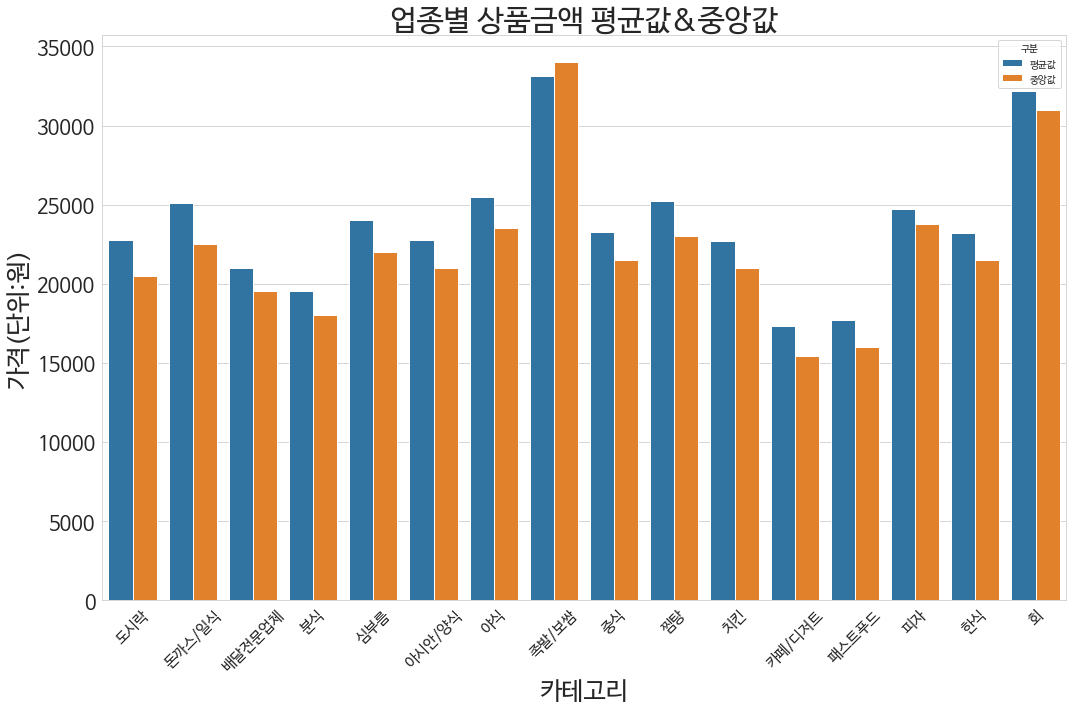

In [53]:
# 카테고리별 상품금액

plt.figure(figsize=(15,10))
sns.barplot(x='배달상점 업종명', y='상품금액',hue='구분',data=new_df)
plt.title('업종별 상품금액 평균값&중앙값', fontsize=30)
plt.ylabel("가격(단위:원)", fontsize=25)
plt.xlabel("카테고리", fontsize=25)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/KGU/논문/data/Figure10.업종별 상품금액 평균값&중앙값.png")
plt.show()

# 대체로 중앙값이 다 낮다.
# 족발 보쌈은 가게별 차이가 크지 않은 것으로 판단된다.
# 타 메뉴도 거진 3000원 이내에서 차이를 갖는다.

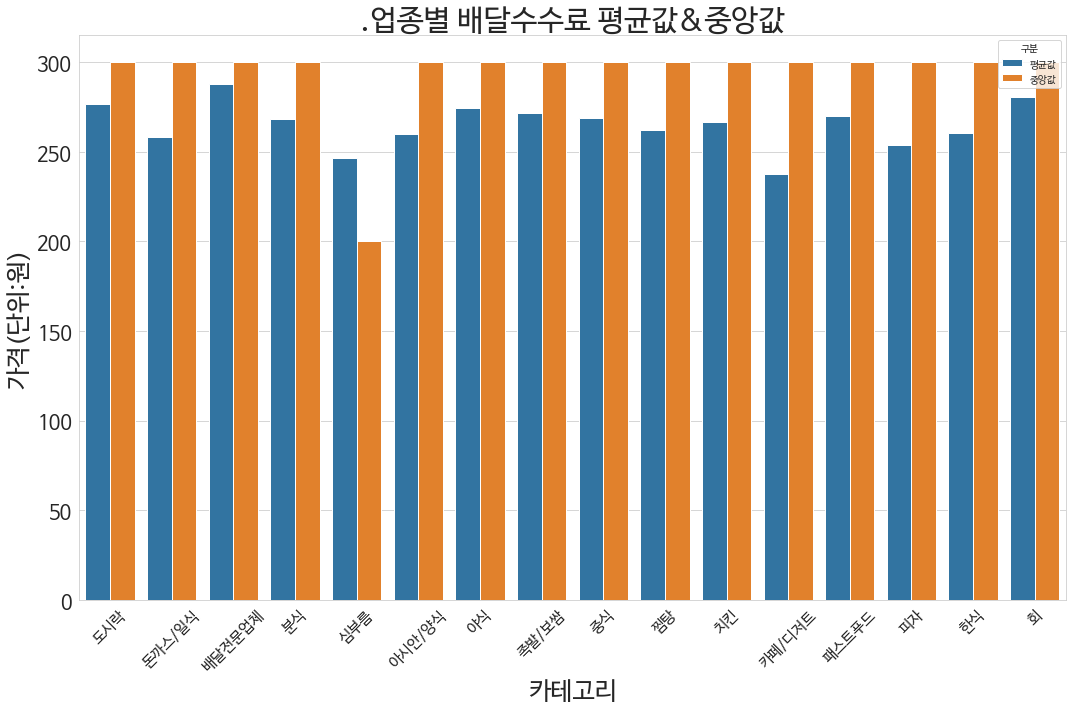

In [54]:
# 카테고리별 평균배달수수료

plt.figure(figsize=(15,10))
sns.barplot(x='배달상점 업종명', y='호출중계수수료금액',hue='구분',data=new_df)
plt.title('.업종별 배달수수료 평균값&중앙값', fontsize=30)
plt.ylabel("가격(단위:원)", fontsize=25)
plt.xlabel("카테고리", fontsize=25)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/KGU/논문/data/Figure11.업종별 배달수수료 평균값&중앙값.png")
plt.show()

# 심부름 카테고리만 중앙값이 평균값보다 낮다. 

#### 9. 서울 시군구별 평균배달금액

In [55]:
# 전국으로 보려면 너무 크니까, 서울만 한정해서 보자

seoul = df[df['광역시도명']=='서울특별시']
seoul = seoul[['시군구명','배달상점 업종명', '배달금액', '호출중계수수료금액', '상품금액', '배달시간계산']]

seoul_mean = seoul.groupby(['시군구명','배달상점 업종명'], as_index=False).mean()
seoul_median = seoul.groupby(['시군구명','배달상점 업종명'], as_index=False).median()

seoul_mean['구분'] = '평균값'
seoul_median['구분'] = '중앙값'


display(seoul_mean)
display(seoul_median)

,시군구명,배달상점 업종명,배달금액,호출중계수수료금액,상품금액,배달시간계산,구분
0,강남구,도시락,4015.151515,235.353535,29484.242424,21.180471,평균값
1,강남구,돈까스/일식,3763.281250,242.187500,28492.708333,21.062109,평균값
2,강남구,배달전문업체,4111.742424,237.878788,19122.979798,24.373380,평균값
3,강남구,분식,3781.487342,206.625791,21837.579114,26.663674,평균값
4,강남구,심부름,3758.620690,244.827586,18753.448276,19.536782,평균값
...,...,...,...,...,...,...,...
157,은평구,카페/디저트,3668.082422,222.918419,16028.574432,26.997932,평균값
158,은평구,패스트푸드,3353.520352,255.434543,20703.707371,22.986379,평균값
159,은평구,한식,3747.587656,296.684819,21954.495080,24.898912,평균값
160,은평구,회,3742.997257,375.579752,35528.609426,28.578785,평균값


,시군구명,배달상점 업종명,배달금액,호출중계수수료금액,상품금액,배달시간계산,구분
0,강남구,도시락,3500,250,25000,16.933333,중앙값
1,강남구,돈까스/일식,3500,250,25000,19.316667,중앙값
2,강남구,배달전문업체,4000,250,17450,22.450000,중앙값
3,강남구,분식,3700,250,20000,25.450000,중앙값
4,강남구,심부름,3500,250,17600,16.066667,중앙값
...,...,...,...,...,...,...,...
157,은평구,카페/디저트,3500,300,14900,24.758333,중앙값
158,은평구,패스트푸드,3400,300,19150,21.833333,중앙값
159,은평구,한식,3630,300,20000,23.916667,중앙값
160,은평구,회,3500,400,36000,27.583333,중앙값


In [56]:
new_df2 = pd.concat([seoul_mean, seoul_median], axis=0)


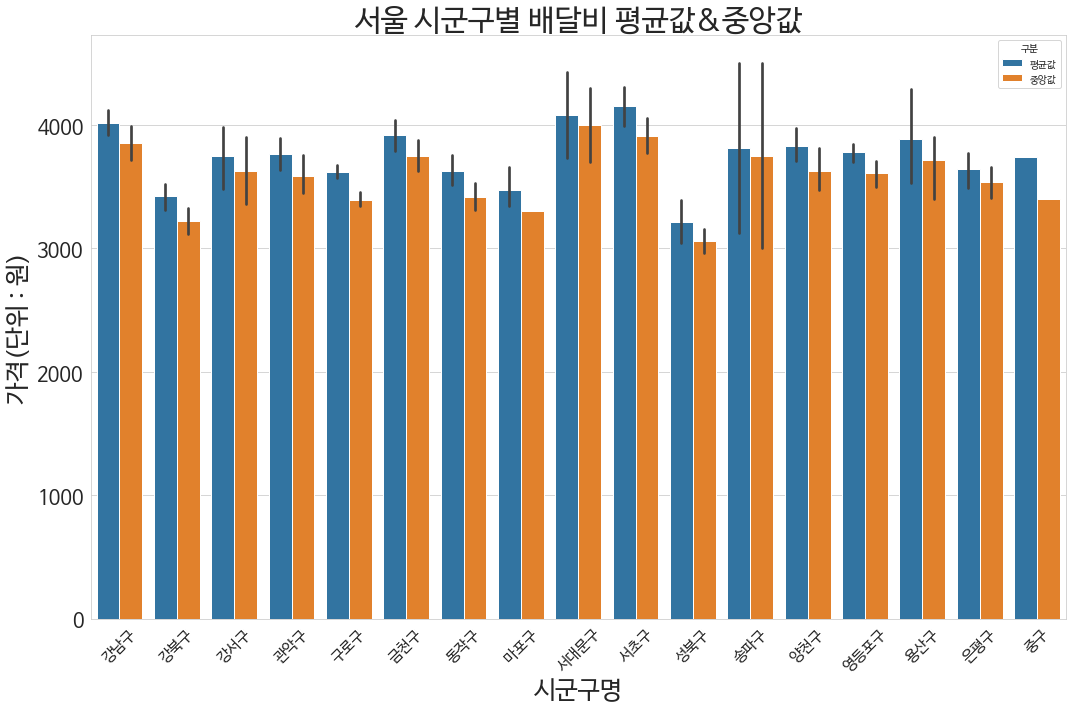

In [57]:
plt.figure(figsize=(15,10))
sns.barplot(x='시군구명', y='배달금액',hue='구분',data=new_df2)
plt.title('서울 시군구별 배달비 평균값&중앙값', fontsize=30)
plt.ylabel("가격(단위 : 원)", fontsize=25)
plt.xlabel("시군구명", fontsize=25)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/KGU/논문/data/Figure12.서울 시군구별 배달비 평균값&중앙값.png")
plt.show()

# 모든 구가 있지는 않다.
# 배달비는 구에 따라 큰 차이를 보인다. (공시지가와 연결해야 할 것 같다.)

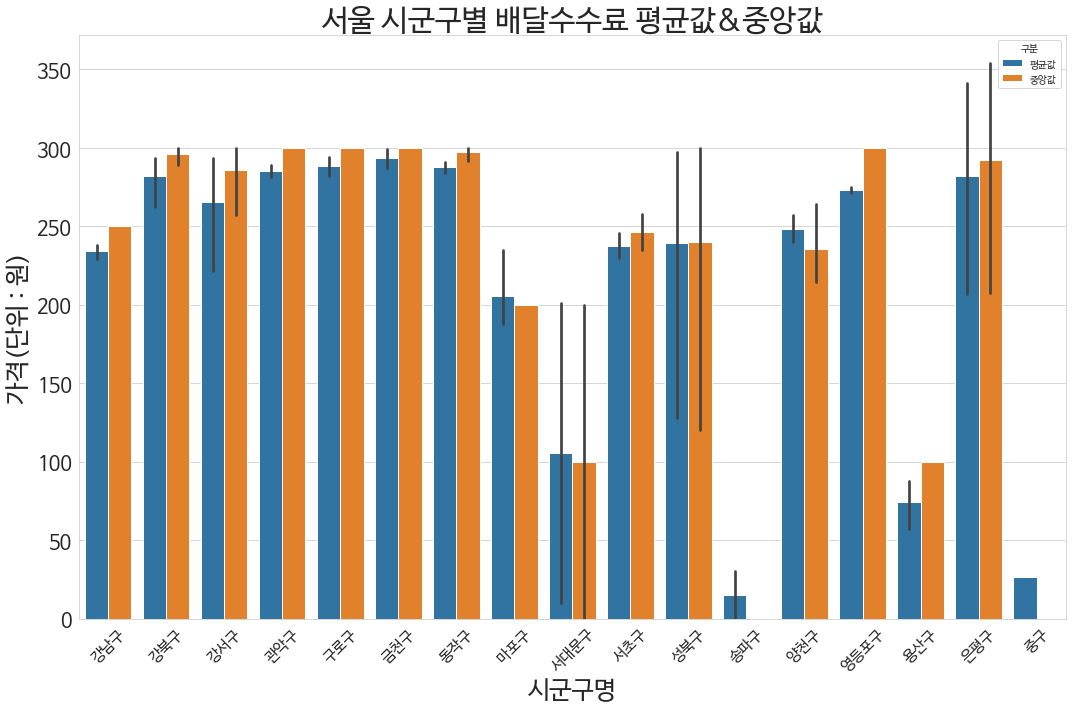

In [58]:
plt.figure(figsize=(15,10))
sns.barplot(x='시군구명', y='호출중계수수료금액',hue='구분',data=new_df2)
plt.title('서울 시군구별 배달수수료 평균값&중앙값', fontsize=30)
plt.ylabel("가격(단위 : 원)", fontsize=25)
plt.xlabel("시군구명", fontsize=25)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/KGU/논문/data/Figure13.서울 시군구별 배달수수료 평균값&중앙값.png")
plt.show()

# 모든 구가 있지는 않다.
# 배달수수료는 대체로 200-300원대를 형성하고 있지만, 특정 구는 0원인 것으로 파악된다.
# 해당 지역 데이터가 적은 것인지, 데이터 오류인 것인지, 아니면 실제 구마다 혜택이 다른 것인지 파악이 필요하다.

In [59]:
print("송파구 데이터 :",len(df[df['시군구명']=='송파구']))
print("중구 데이터 :",len(df[df['시군구명']=='중구']))
print("서대문구 데이터 :",len(df[df['시군구명']=='서대문구']))

# 1만개 이하 데이터는 0 값에 영향을 많이 받는 것으로 판단 ==> 나중에 확인 필요
print("성북구 데이터 :",len(df[df['시군구명']=='성북구']))
print("강남구 데이터 :",len(df[df['시군구명']=='강남구']))

송파구 데이터 : 930
중구 데이터 : 236
서대문구 데이터 : 1523
성북구 데이터 : 11197
강남구 데이터 : 12891


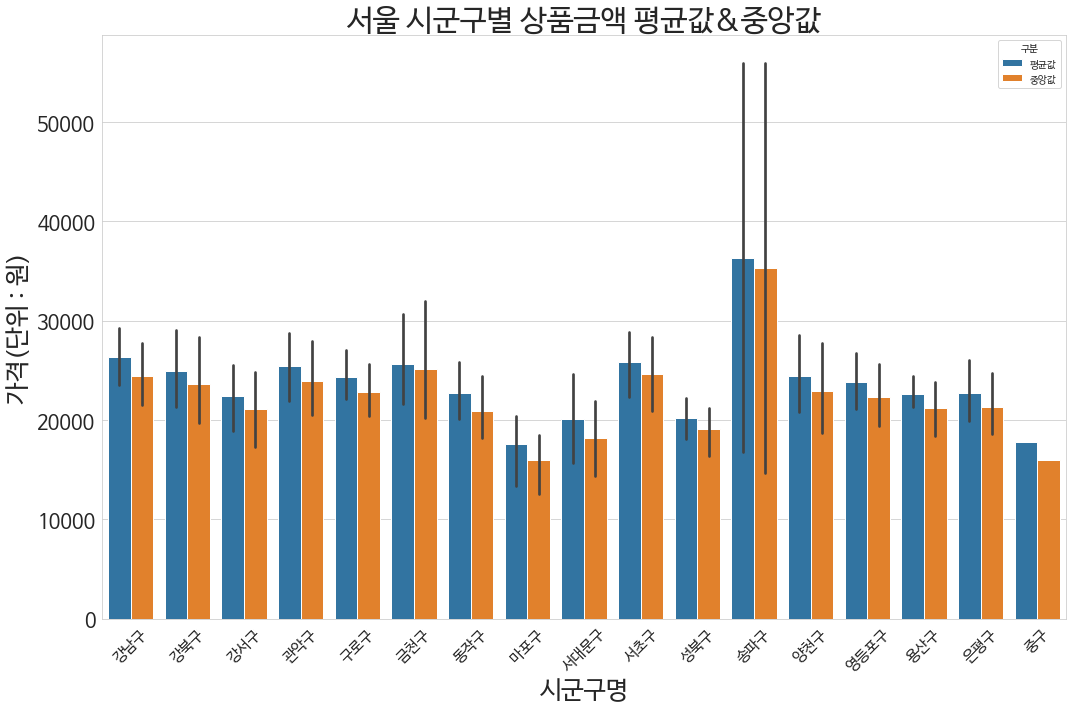

In [60]:
plt.figure(figsize=(15,10))
sns.barplot(x='시군구명', y='상품금액',hue='구분',data=new_df2)
plt.title('서울 시군구별 상품금액 평균값&중앙값', fontsize=30)
plt.ylabel("가격(단위 : 원)", fontsize=25)
plt.xlabel("시군구명", fontsize=25)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/KGU/논문/data/Figure14.서울 시군구별 상품금액 평균값&중앙값.png")
plt.show()

# 송파구의 차이가 큰 것으로 보인다.
# 금천구도 고려할 것

# 금액에 대한 인사이트는 없다. 카테고리별로 보아야 할 듯?

# 인사이트 정리

- 시간의 흐름에 따라 상점 수는 증가한다. 하지만 그에 따라 폐점하는 점포도 양의 기울기를 갖는다.
- 라이더는 시간의 흐름에 관계없이 일정한 수를 유지하는 경향을 갖는다. (코로나에 따른 영향이 존재하지 않는다.)
- 요일로 보았을 때 월, 화가 가장 배달건수가 적다.
- 배달건수 또한 시간의 흐름에 따라 증가한다.
- 코로나 이후 발달하며 배달 시간이 줄어들 것이라 예상했지만, 평균을 유지했다.
- 배달비, 수수료, 상품금액엔 이상치가 존재한다.
- 카테고리별 평균배달비는 3500 원대로 카테고리에 상관없이 균등한 분포를 보인다.
- 카테고리별 평균배달수수료 또한 대체로 300원대에 위치하며, 심부름만 수수료가 낮다.
- 카테고리별 상품금액의 차이는 존재한다. (찜탕 등 여러 명이 먹을 수 밖에 없는 요리는 가격대가 존재한다.)
- 데이터 내 모든 시군구가 존재하는 것은 아니며, 서울의 경우 구에 따라 배달비 차이가 1000원 이상 나는 곳도 존재한다. (성북구<->서초구) ==> 공시지가 연결 필요
- 서울의 특정 구에는 데이터가 너무 부족해 평균값이 왜곡된다. (송파구, 중구)
- 

# 알아보고 싶은 것들/ 해보고 싶은 것들
- 배달시간과 배달건수가 상관관계를 갖는지 알기 위해, 배달상점ID를 기준으로 mean 하여 size를 판단해보자
- 코로나로 인해 폐점하는 업체가 정말 많았는지, 비율로 나눠서 알아보자 (2020년 1월 20일에 코로나 확진자가 처음 발생하였다.)
- 코로나 이후 배달시간이 줄어드는지 확인해보자 (라이더배치 / 픽업이동 등)
- 코로나 이후 배달요청업체 / 배달접수업체 등이 늘어났는지 파악
- 공시지가를 활용해 배달비 차이가 나는 것과의 상관관계를 알아보자
- 배달비가 낮을수록 매출량이 많은지 확인

#### 10. 배달비에 따른 수요공급곡선 작성 자료 확인

In [61]:
df['배달금액'].value_counts()

# 3500원을 균형이라고 가정, 소비자와 공급자는 한 명이라 가정 
# 수요곡선(소비자)의 기울기는 -31.25, 상수항은 4125 이며
# 공급곡선(소상공인)의 기울기는 83.3, 상수항은 1833 이다.
# 이를 통해 공급곡선이 수요곡선보다 탄력적임을 알 수 있다.
# 다만 데이터가 현재 기울기를 따르고 있지 않으며, 대표값으로만 추정한 기울기이기에 정확하지 않다.
# 또한 데이터 자체가 적을 수 있다는 함정이 존재한다. (ex. 배달비를 4000원대로 설정한 가게가 적을 수 있음)
# 기본적으로 미시경제 관점에서 완전경쟁시장의 균형은 이익이 0이다. (손익분기점이 균형이다.)
# 때문에 이익을 보려면 균형보다 못하지만, 한계이익이 존재하는 부분에서 가격을 책정하여 초과수요 효과를 노려야 한다. 

3500    2035000
3000    1486655
3300    1341359
4000     484209
3630     379331
         ...   
5001          1
4841          1
4901          1
5790          1
4601          1
Name: 배달금액, Length: 228, dtype: int64

#### 11. 배달시간과 매출량 상관관계 파악

In [62]:
shop_id1 = df.groupby('배달상점ID', as_index=False).size()
shop_id1 = pd.DataFrame(shop_id1)

shop_id2 = df.groupby('배달상점ID', as_index=False).mean()
shop_id2 = shop_id2[['배달상점ID', '배달시간계산']]

shop_id = pd.merge(shop_id1, shop_id2, how='inner', on='배달상점ID')
shop_id = shop_id.set_index('배달상점ID')
corr_df = shop_id.corr()
s = corr_df.unstack()

corr_df1 = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
corr_df1.style.background_gradient(cmap='viridis')

# 음의 상관관계? 
# 0에 가까운 기울기인 것으로 보아 상관관계가 아주 적다고 볼 수 있다.
# 다만 배달시간이 늘어난다는 것은 배달거리가 늘어난다는 것이다. 이는 배달거리가 늘어날수록 매출에 안좋은 영향을 갖는다고 말할 수 있다.

,,corr
배달시간계산,size,-0.115209
size,배달시간계산,-0.115209


#### 12. 코로나 전후 비교
- 2019년 & 2020년 단순비교
- 코로나 전 / 대확산시기 / 코로나 후 비교

In [63]:
query1 = "(처리일시 < '2019-09-01') and (처리일시 > '2019-07-31')"
df_201908 = df.query(query1)

query2 = "(처리일시 < '2020-09-01') and (처리일시 > '2020-07-31')"
df_202008 = df.query(query2)

df_201908['년도'] = "2019"
df_202008['년도'] = "2020"
compare_df = pd.concat([df_201908,df_202008])

check1 = compare_df.groupby("년도", as_index=False).size()
check1.columns = ['년도', '배달건수 (단위 : 건)']
display(check1)

,년도,배달건수 (단위 : 건)
0,2019,397370
1,2020,947167


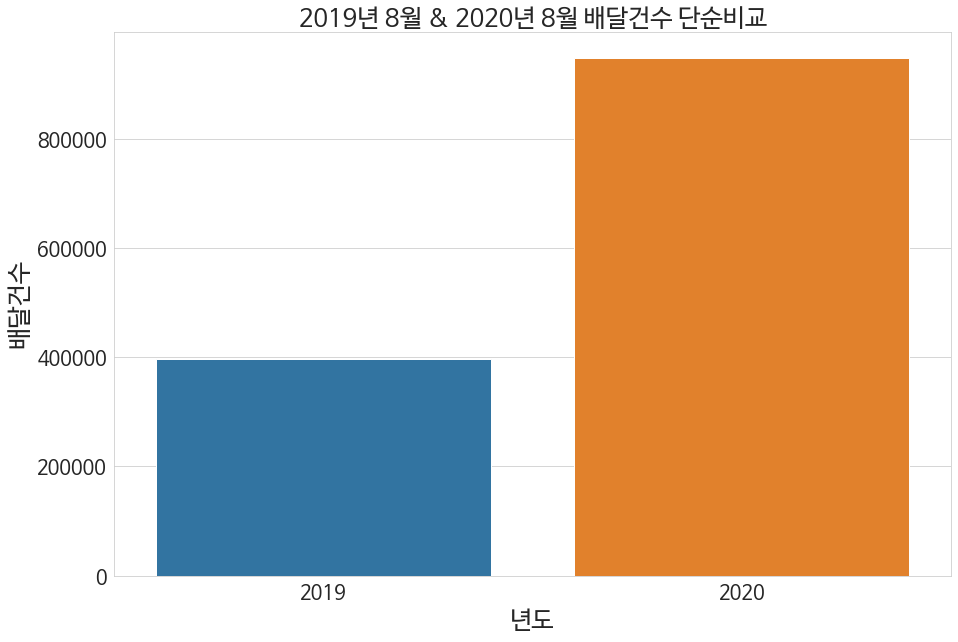

In [64]:
plt.figure(figsize=(15,10))
a = sns.countplot(data= compare_df,x= "년도")
a.axes.set_title("2019년 8월 & 2020년 8월 배달건수 단순비교", fontsize=25) 
a.set_xlabel("년도", fontsize=25) 
a.set_ylabel("배달건수", fontsize=25)
a.tick_params(labelsize=20)
plt.savefig('/content/drive/MyDrive/KGU/논문/data/Figure15.2019년 8월 & 2020년 8월 배달건수 단순비교.png')
plt.show()

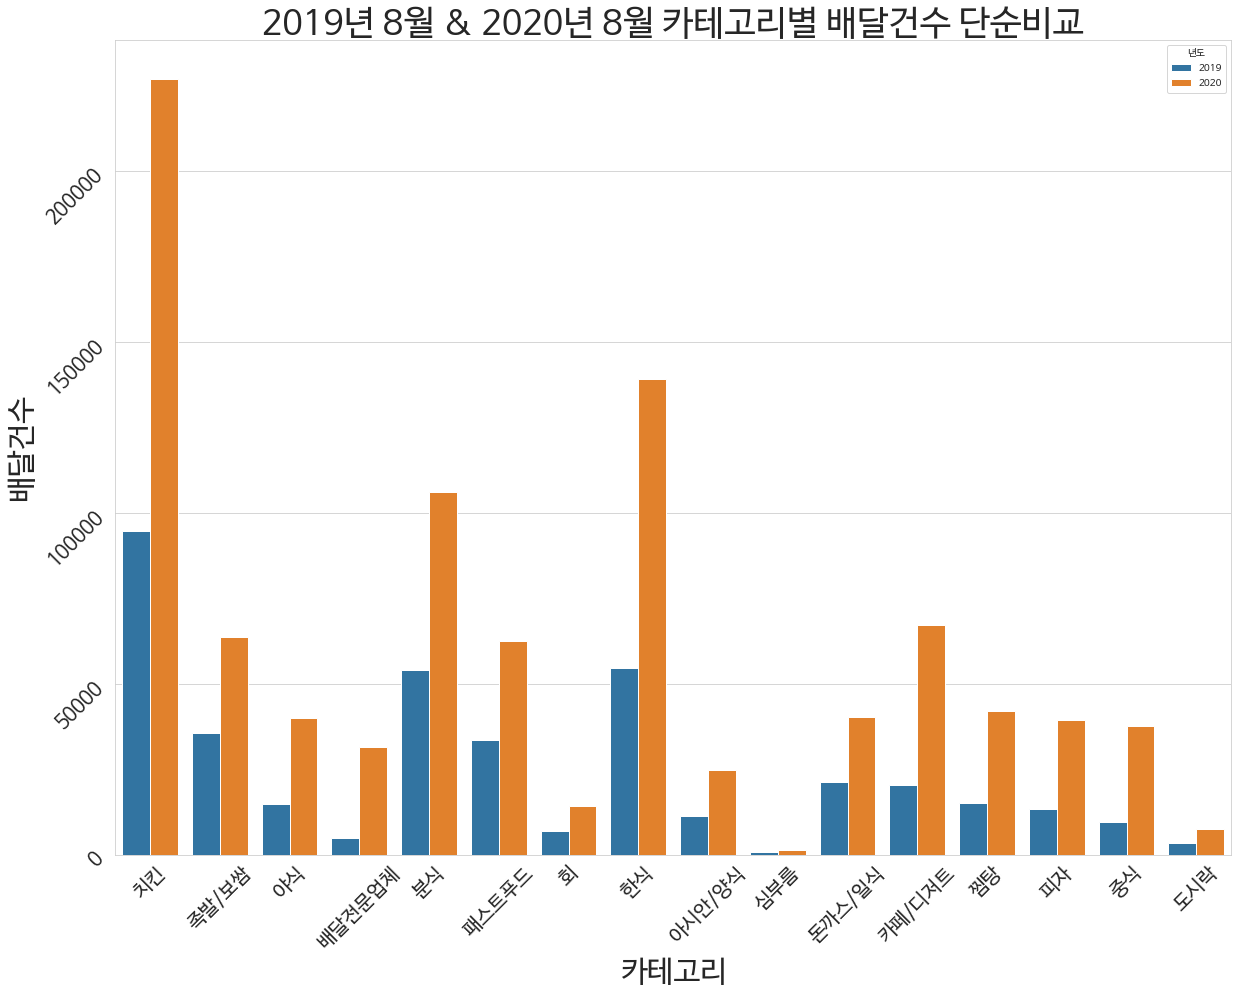

In [65]:
check1_1 = compare_df.groupby(["배달상점 업종명", "년도"], as_index=False).size()

# 카테고리별 
plt.figure(figsize=(20,15))
a = sns.countplot(data= compare_df,x= "배달상점 업종명",hue = "년도")
a.axes.set_title("2019년 8월 & 2020년 8월 카테고리별 배달건수 단순비교", fontsize=35) 
a.set_xlabel("카테고리", fontsize=30) 
a.set_ylabel("배달건수", fontsize=30)
a.tick_params(rotation=45,labelsize=20)
plt.savefig('/content/drive/MyDrive/KGU/논문/data/Figure15.2019년 8월 & 2020년 8월 카테고리별 배달건수 단순비교.png')
plt.show()


In [66]:
# 코로나 확산에 따른 배달량 비교

# 2019년 8월 --> 코로나 전
# 2020년 2월 --> 코로나 대확산 시기
# 2020년 5월 --> 코로나 후

# 2019년 8월
query1 = "(처리일시 < '2019-09-01') and (처리일시 > '2019-07-31')"
df_201908 = df.query(query1)

# 2020년 2월 18일 ~ 3월 17일
query2 = "(처리일시 < '2020-03-18') and (처리일시 > '2020-02-17')"
df_202002 = df.query(query2)

# 2020년 5월
query3 = "(처리일시 < '2020-06-01') and (처리일시 > '2020-04-30')"
df_202005 = df.query(query3)

corona_compare_df = pd.concat([df_201908, df_202002, df_202005])

check2 = corona_compare_df.groupby("코로나", as_index=False).size()
check2.columns = ['코로나', '배달건수 (단위 : 건)']
check2 = check2.sort_values(by = '배달건수 (단위 : 건)', ascending=True)
check2.reset_index(drop=True, inplace=True)
display(check2)

,코로나,배달건수 (단위 : 건)
0,전,397370
1,대확산,656999
2,후,811374


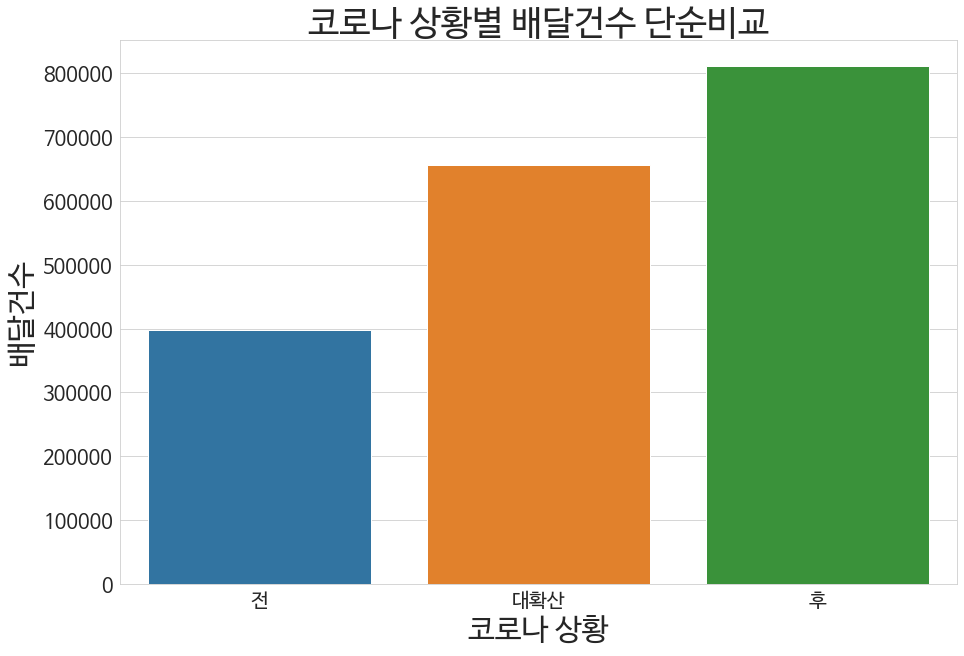

In [67]:
plt.figure(figsize=(15,10))
a = sns.countplot(data= corona_compare_df,x= "코로나")
a.axes.set_title("코로나 상황별 배달건수 단순비교", fontsize=35) 
a.set_xlabel("코로나 상황", fontsize=30) 
a.set_ylabel("배달건수", fontsize=30)
a.tick_params(labelsize=20)
plt.savefig('/content/drive/MyDrive/KGU/논문/data/Figure16.코로나 상황별 배달건수 단순비교.png')
plt.show()

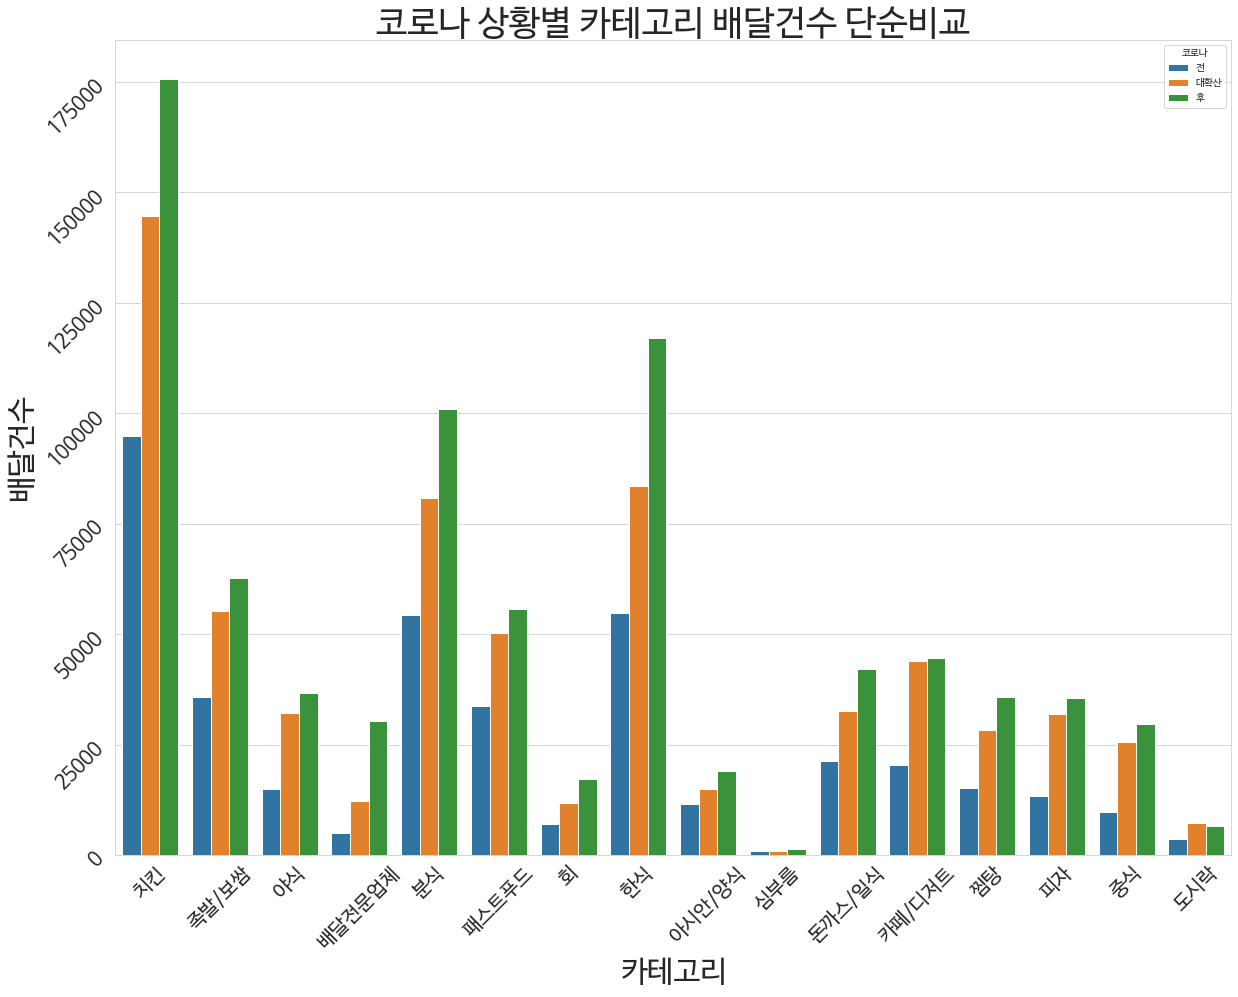

In [68]:
# 카테고리별 
plt.figure(figsize=(20,15))
a = sns.countplot(data= corona_compare_df,x= "배달상점 업종명",hue = "코로나")

a.axes.set_title("코로나 상황별 카테고리 배달건수 단순비교", fontsize=35) 
a.set_xlabel("카테고리", fontsize=30) 
a.set_ylabel("배달건수", fontsize=30)
a.tick_params(rotation=45, labelsize=20)


plt.savefig('/content/drive/MyDrive/KGU/논문/data/Figure17.코로나 상황별 카테고리 배달건수 단순비교.png')
plt.show()

#### 13. 코로나에 따른 폐점율 파악

평균 폐점률 22.15
코로나 전 폐점률 : 17.43
코로나 후 폐점률 : 23.71


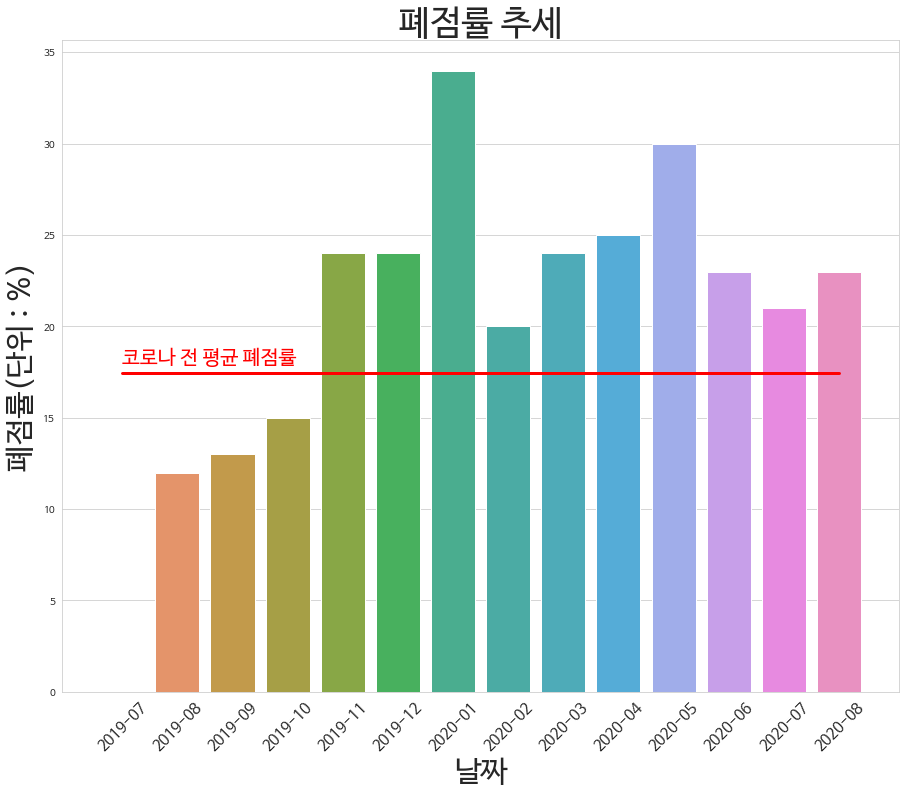

In [69]:
# 배달업체가 폐점한 곳은 코로나의 영향이 있었을까?
# O2O 산업이 성장함에 따라 배달상점 자체도 늘어났다.
# 그렇다면 모집단이 커지기 때문에 단순히 폐점하는 수가 많다고 해서 코로나로 인해 피해가 생겼다고 말할 수 없다.
# 때문에 그 비율로 확인할 필요가 있다.

closed_rate = [0]
for x in range(1, len(date_list)) :
  closed_rate.append(round(close_shop[x]/shop_list[x],2)*100)

closed_dataframe = pd.DataFrame([date_list, closed_rate]).T
closed_dataframe.columns = ['날짜', '폐점률(단위 : %)']
closed_dataframe
# 평균적으로 코로나 시기에 폐점률이 높다. ==> 시각화 진행 필요

print("평균 폐점률", round(sum(closed_rate[1:])/13,2))
print("코로나 전 폐점률 :",round(sum(closed_rate[1:7])/7,2))
print("코로나 후 폐점률 :",round(sum(closed_rate[7:])/7,2))


plt.figure(figsize=(15,12))
a = sns.barplot(data= closed_dataframe,x= "날짜", y='폐점률(단위 : %)')
sns.lineplot(x=closed_dataframe['날짜'], y=round(sum(closed_rate[1:7])/7,2), linewidth=3, color='red')
a.axes.set_title("폐점률 추세", fontsize=35) 
a.set_xlabel("날짜", fontsize=30) 
a.set_ylabel("폐점률(단위 : %)", fontsize=30)
plt.text(0,18,"코로나 전 평균 폐점률", fontsize=20, color="red")
plt.xticks(rotation=45,fontsize=15)
plt.savefig('/content/drive/MyDrive/KGU/논문/data/Figure18.폐점률 추세.png')
plt.show()

#### 14. 코로나로 인한 O2O 서비스 확장 파악

In [80]:
# 코로나 이후 O2O 서비스 형태가 정말 성장했는지 확인하고자 한다.
# 배달요청업체ID	배달접수업체ID를 확인해보자

o2o_food = []
set_o2o_food = []
o2o_deli = []
set_o2o_deli = []

for x in tqdm(date_list) :
    check = df[df['Date']==x]
    o2o_food.append(check['배달요청업체ID'].nunique())
    # set_o2o_food.append(check['배달요청업체ID'].unique())
    o2o_deli.append(check['배달접수업체ID'].nunique())
    # set_o2o_deli.append(check['배달접수업체ID'].unique())

o2o_df = pd.DataFrame([date_list, o2o_food, o2o_deli]).T

# o2o_df_food = pd.DataFrame([date_list, o2o_food]).T
# o2o_df_deli = pd.DataFrame([date_list, o2o_deli]).T
# o2o_df_food['구분'] = '배달요청업체'
# o2o_df_deli['구분'] = '배달접수업체'

# o2o_df = pd.concat([o2o_df_food, o2o_df_deli], axis=0)
o2o_df.columns = ['날짜', '배달요청업체', '배달접수업체']
# o2o_df


100%|██████████| 14/14 [00:11<00:00,  1.21it/s]


In [83]:
o2o_df['배달요청업체'] = o2o_df['배달요청업체'].astype(int)
o2o_df['배달접수업체'] = o2o_df['배달접수업체'].astype(int)

No handles with labels found to put in legend.


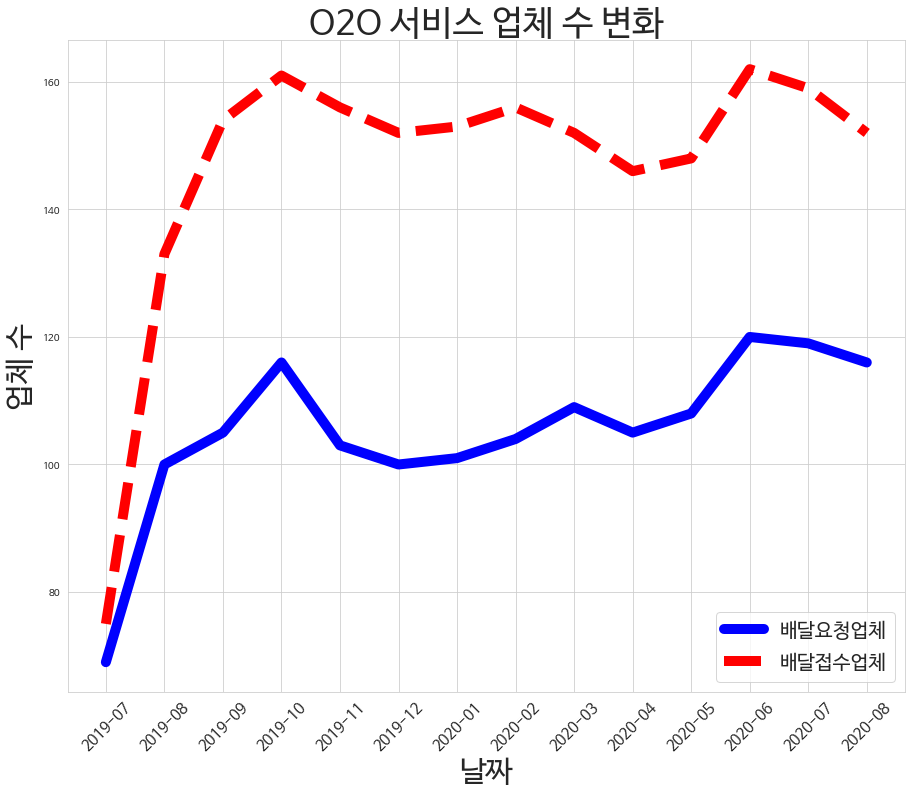

In [87]:
plt.figure(figsize=(15,12))
sns.lineplot(data= o2o_df, x= "날짜", y='배달요청업체', color='blue', linewidth=10)
sns.lineplot(data= o2o_df,x= "날짜", y='배달접수업체', color='red', linewidth=10, linestyle='--')
plt.title("O2O 서비스 업체 수 변화", fontsize=35) 
plt.xlabel("날짜", fontsize=30) 
plt.ylabel("업체 수", fontsize=30)
plt.legend()
plt.xticks(rotation=45,fontsize=15)
plt.legend(labels=('배달요청업체', '배달접수업체'), fontsize=20)
plt.savefig('/content/drive/MyDrive/KGU/논문/data/Figure19.O2O 서비스 업체 수 변화.png')
plt.show()

#### 15. O2O 서비스는 좋아졌을까?

- 서비스의 기준은 배달접수까지 걸리는 시간이다.



100%|██████████| 14/14 [00:00<00:00, 25354.17it/s]


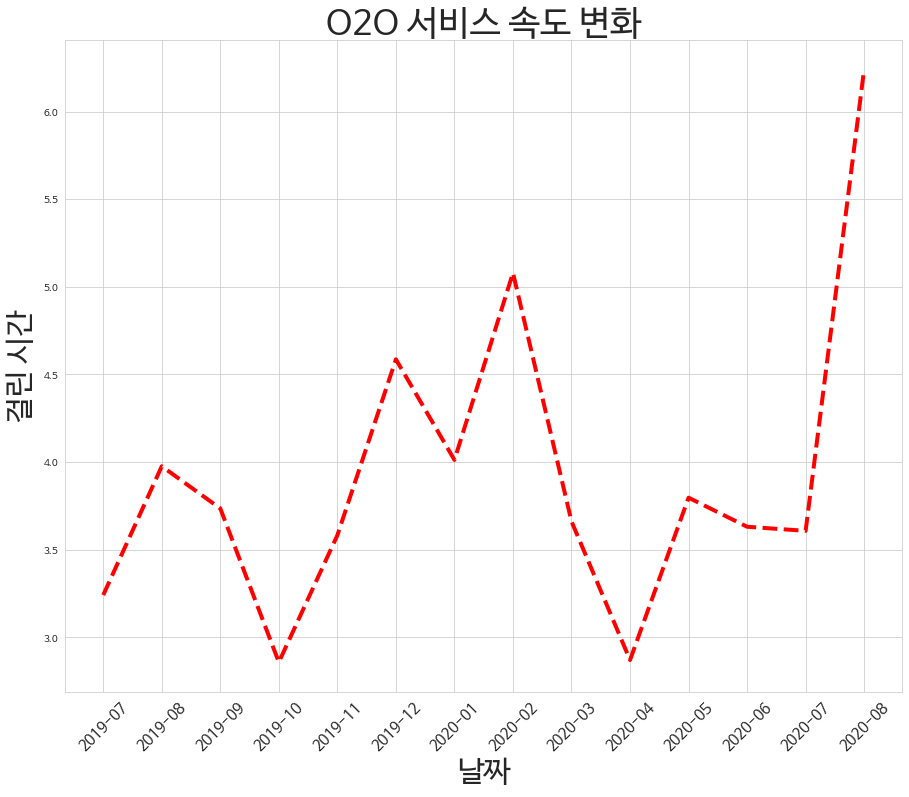

In [105]:
date_list = df['Date'].unique()

time_check = []
for zz in tqdm(date_list) :
  check = df[df['Date']==zz]
  time_check.append(check['라이더배치시간'].mean())

o2o_time = pd.DataFrame([date_list]).T
o2o_time.columns = ["날짜"]

new_list = []
for time in tqdm(time_check) :
    new_list.append(time.total_seconds() / 60)
    
o2o_time['평균라이더배치시간'] = new_list

plt.figure(figsize=(15,12))
sns.lineplot(data= o2o_time, x= "날짜", y='평균라이더배치시간', color='red', linewidth=4, linestyle="--")
plt.title("O2O 서비스 속도 변화", fontsize=35) 
plt.xlabel("날짜", fontsize=30) 
plt.ylabel("걸린 시간", fontsize=30)
plt.xticks(rotation=45,fontsize=15)
plt.savefig('/content/drive/MyDrive/KGU/논문/data/Figure20.O2O 서비스 속도 변화.png')
plt.show()


## 딱히 서비스가 좋아졌다고 느껴지진 않는다. 아마도 time 입력 오류일 가능성이 크다.

#### 16. 라이더배치 효율은 좋아졌을까?
- 라이더가 증가함에 따라 픽업까지 걸리는 시간이 감소했을 것으로 추정 (다만 배달건수도 늘어남에 따라 그대로 유지할 가능성도 존재)

100%|██████████| 14/14 [00:00<00:00, 49427.82it/s]


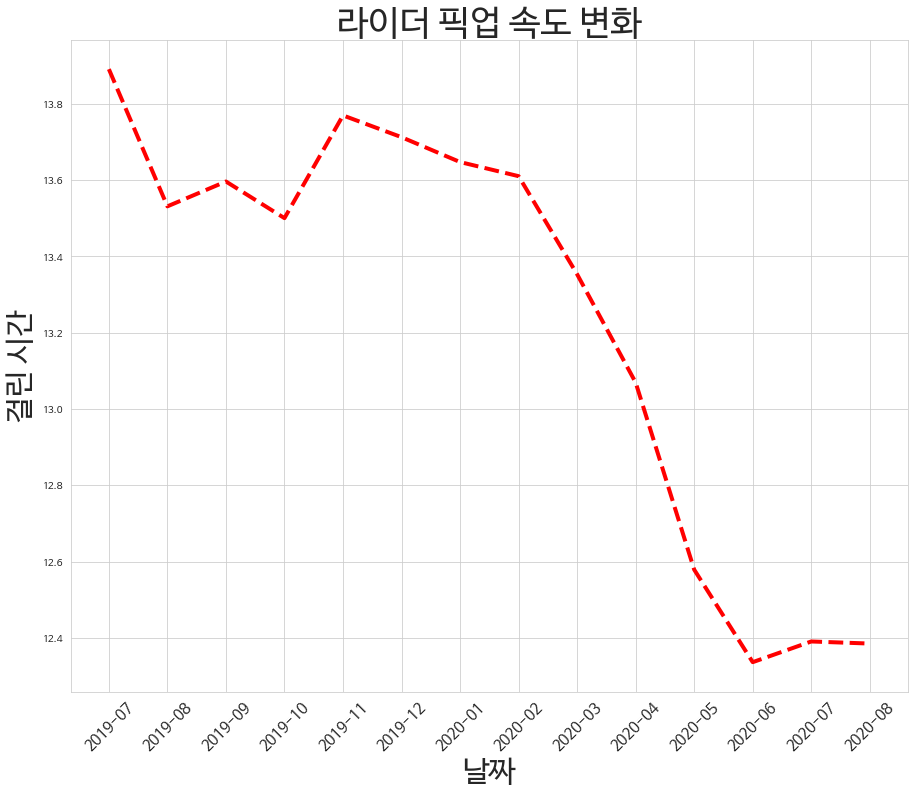

In [106]:
date_list = df['Date'].unique()

time_check = []
for zz in tqdm(date_list) :
  check = df[df['Date']==zz]
  time_check.append(check['픽업이동시간'].mean())

o2o_time = pd.DataFrame([date_list]).T
o2o_time.columns = ["날짜"]

new_list = []
for time in tqdm(time_check) :
    new_list.append(time.total_seconds() / 60)
    
o2o_time['평균픽업이동시간'] = new_list

plt.figure(figsize=(15,12))
sns.lineplot(data= o2o_time, x= "날짜", y='평균픽업이동시간', color='red', linewidth=4, linestyle="--")
plt.title("라이더 픽업 속도 변화", fontsize=35) 
plt.xlabel("날짜", fontsize=30) 
plt.ylabel("걸린 시간", fontsize=30)
plt.xticks(rotation=45,fontsize=15)
plt.savefig('/content/drive/MyDrive/KGU/논문/data/Figure21.라이더 픽업 속도 변화.png')
plt.show()

## 변화가 있따!!!

#### 17. 순수이동시간도 줄어들었을까?

100%|██████████| 14/14 [00:00<00:00, 7559.25it/s]


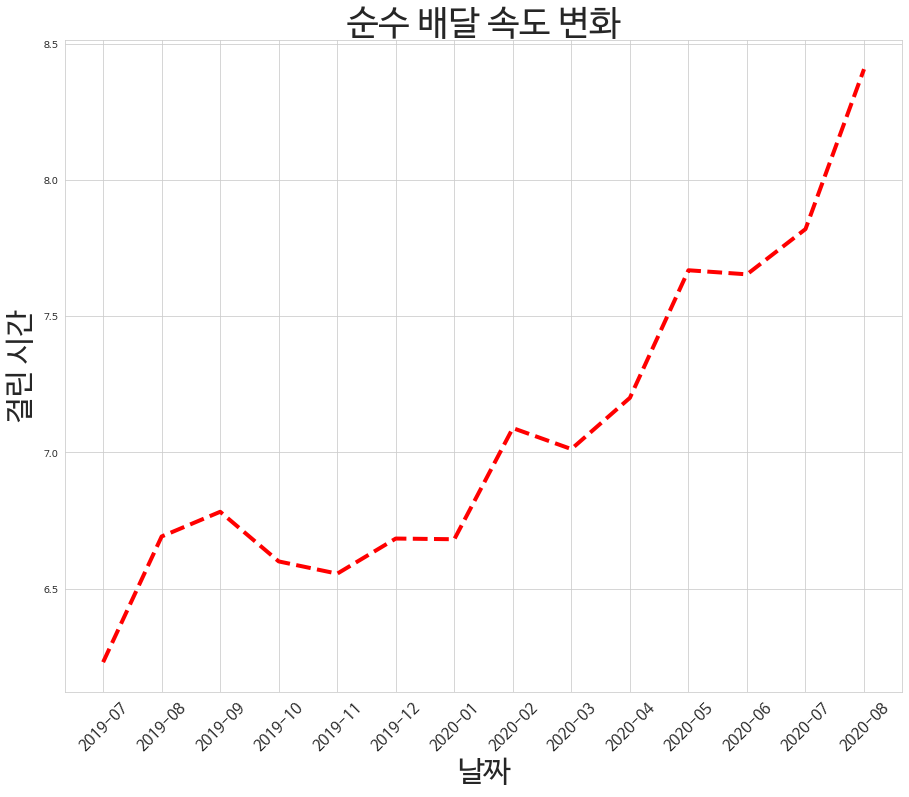

In [107]:
date_list = df['Date'].unique()

time_check = []
for zz in tqdm(date_list) :
  check = df[df['Date']==zz]
  time_check.append(check['순수배달시간'].mean())

o2o_time = pd.DataFrame([date_list]).T
o2o_time.columns = ["날짜"]

new_list = []
for time in tqdm(time_check) :
    new_list.append(time.total_seconds() / 60)
    
o2o_time['평균순수배달시간'] = new_list

plt.figure(figsize=(15,12))
sns.lineplot(data= o2o_time, x= "날짜", y='평균순수배달시간', color='red', linewidth=4, linestyle="--")
plt.title("순수 배달 속도 변화", fontsize=35) 
plt.xlabel("날짜", fontsize=30) 
plt.ylabel("걸린 시간", fontsize=30)
plt.xticks(rotation=45,fontsize=15)
plt.savefig('/content/drive/MyDrive/KGU/논문/data/Figure22.순수 배달 속도 변화.png')
plt.show()

#### 18. 공시지가와 배달비 상관관계